## Problem Statement

### Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

### Objective:

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

# Importing necessary libraries

In [7]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

## This is to display multiple data frames from one cell
from IPython.display import display

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics #model performance metrics
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Overview & EDA

## Loading the data

In [10]:
import os
path = os.getcwd() + '\\Rose.csv'
data = pd.read_csv(path)
df1 = data.copy()

In [11]:
print('First few rows of Data')
display(df1.head())
print('Last few rows of Data')
display(df1.tail())

First few rows of Data


YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

Last few rows of Data


YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

## Read the data as appropriate time-series data

In [13]:
TimeStamp= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
TimeStamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='ME')

In [14]:
df1['TimeStamp'] = TimeStamp
df1.head()

YearMonth   Rose  TimeStamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [15]:
df1.set_index(keys='TimeStamp', inplace=True)
df1.drop(['YearMonth'], axis=1, inplace=True)

In [16]:
df1.rename(columns={'Rose':'RoseWine_Sales'}, inplace=True)

In [17]:
df1.head() #first 5 rows of the dataset

RoseWine_Sales
TimeStamp                 
1980-01-31           112.0
1980-02-29           118.0
1980-03-31           129.0
1980-04-30            99.0
1980-05-31           116.0

In [18]:
df1.tail() #last 5 rows of the dataset

RoseWine_Sales
TimeStamp                 
1995-03-31            45.0
1995-04-30            52.0
1995-05-31            28.0
1995-06-30            40.0
1995-07-31            62.0

In [19]:
print('Shape of dataset: ',df1.shape) #shape of the dataset i.e. no. of rows & columns

Shape of dataset:  (187, 1)


In [20]:
df1.info() #datatypes in the dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RoseWine_Sales  185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [21]:
df1.describe(include='all').T #statistics of the data

count       mean        std   min   25%   50%    75%    max
RoseWine_Sales  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

In [22]:
#Check for null values
print('Null values:-\n')
display(df1.isnull().sum())
display(df1[df1.isnull().values])

Null values:-



RoseWine_Sales    2
dtype: int64

RoseWine_Sales
TimeStamp                 
1994-07-31             NaN
1994-08-31             NaN

### Missing value treatment

In [24]:
df = df1.interpolate(method='spline', order=3)

In [25]:
print('Null-value check post imputation:-')
display(df.isnull().sum())
display(df[df.isnull().values])

Null-value check post imputation:-


RoseWine_Sales    0
dtype: int64

Empty DataFrame
Columns: [RoseWine_Sales]
Index: []

# Exploratory Data Analysis

### Plot data for Wine-sales over time (months-years)

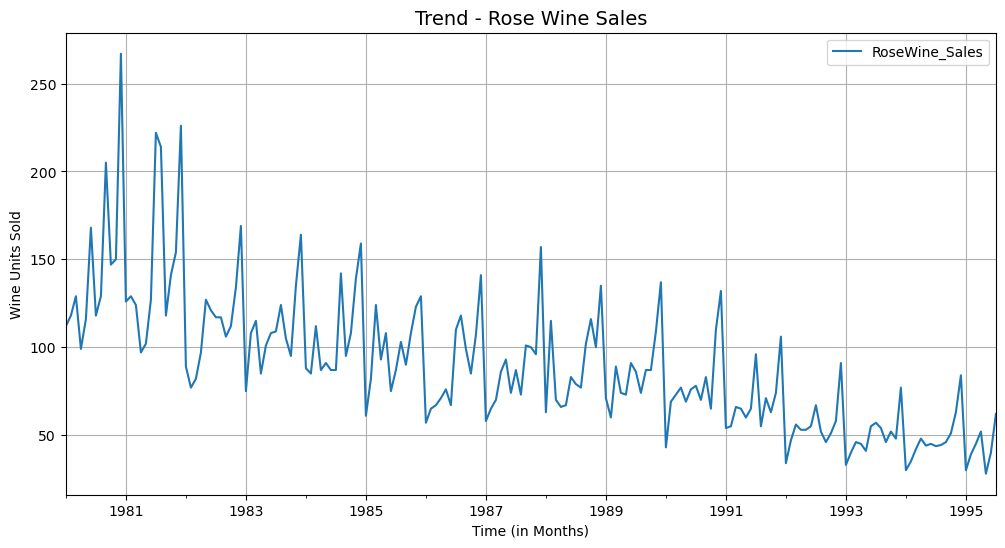

In [28]:
rcParams['figure.figsize'] = 12,6
df.plot(grid=True);
plt.title('Trend - Rose Wine Sales', fontsize=14)
plt.xlabel('Time (in Months)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)
plt.show()

### Plot a boxplot to understand the sales across different years

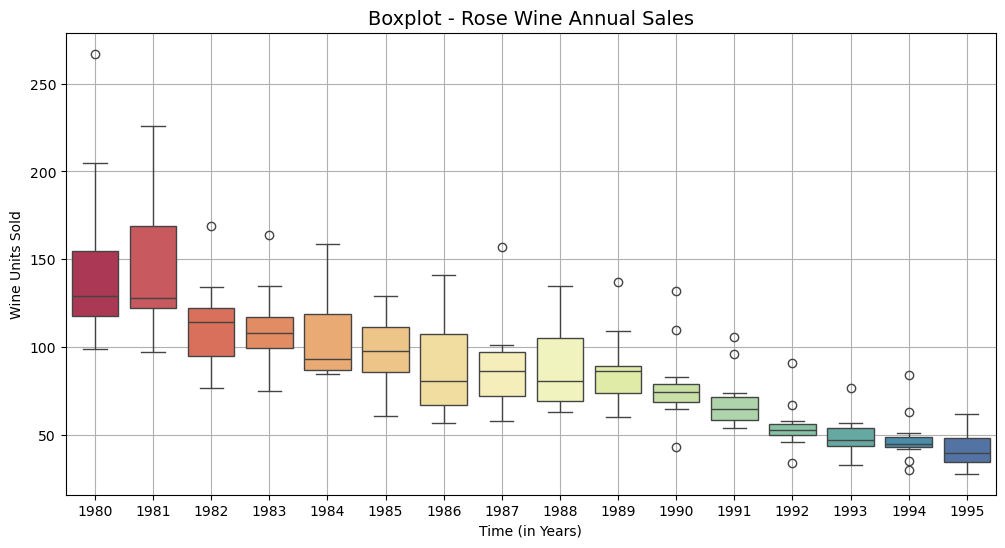

In [30]:
sns.boxplot(data=df, x=df.index.year, y='RoseWine_Sales', palette="Spectral")
plt.title('Boxplot - Rose Wine Annual Sales', fontsize=14)
plt.xlabel('Time (in Years)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)
plt.grid()
plt.show();

### Plot a boxplot to understand the sales at month level

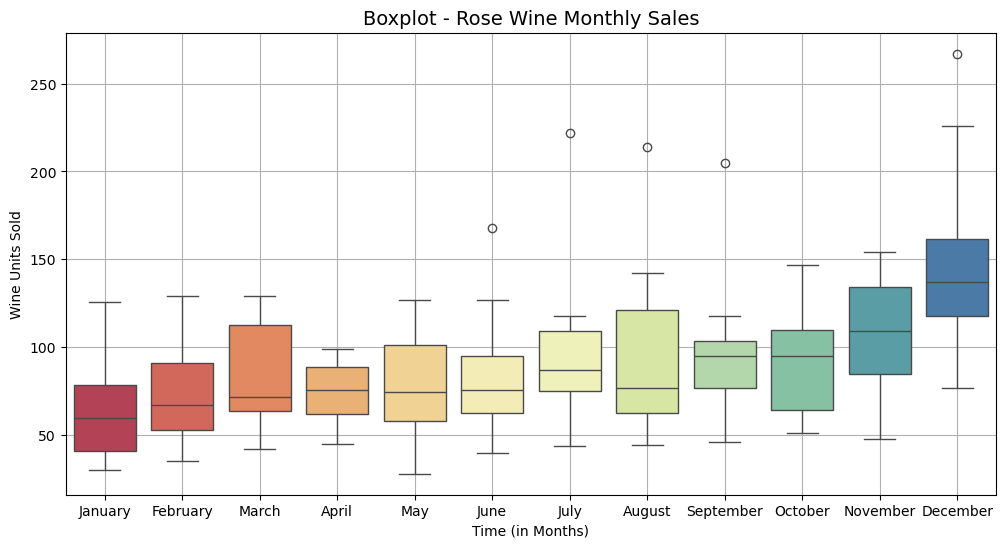

In [32]:
sns.boxplot(data=df, x=df.index.month_name(), y='RoseWine_Sales', palette="Spectral")
plt.title('Boxplot - Rose Wine Monthly Sales', fontsize=14)
plt.xlabel('Time (in Months)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)
plt.grid()
plt.show();

### Plot a time series monthplot to understand the spread

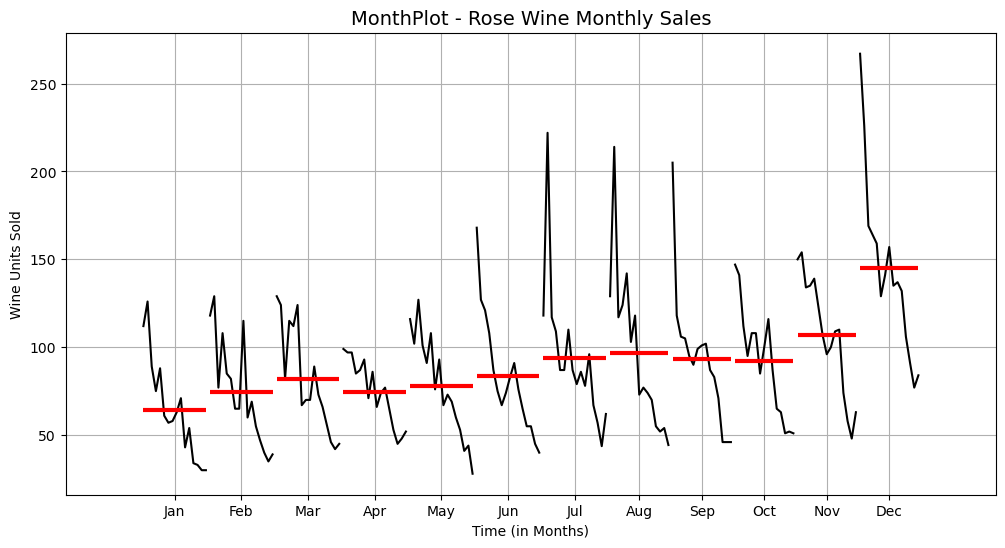

In [34]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['RoseWine_Sales'])
plt.title('MonthPlot - Rose Wine Monthly Sales', fontsize=14)
plt.xlabel('Time (in Months)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)
plt.grid();

### Create a pivot table to display monthly price across years

In [36]:
monthly_sales_across_years = pd.pivot_table(df, values = 'RoseWine_Sales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

TimeStamp     1      2      3     4      5      6           7           8   \
TimeStamp                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   43.693064   44.326877   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

TimeStamp     9      10     11     12  
TimeStamp                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

Text(0, 0.5, 'Wine Units Sold')

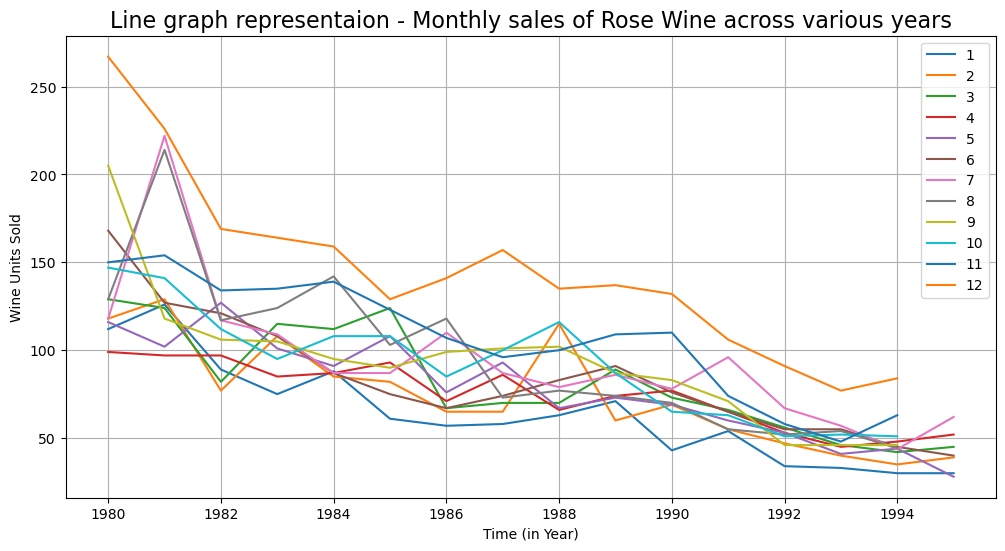

In [37]:
monthly_sales_across_years.plot()
plt.grid()
plt.title('Line graph representaion - Monthly sales of Rose Wine across various years', fontsize=16)
plt.legend(loc='best');
plt.xlabel('Time (in Year)')
plt.ylabel('Wine Units Sold')

### Plot the Empirical Cumulative Distribution Function

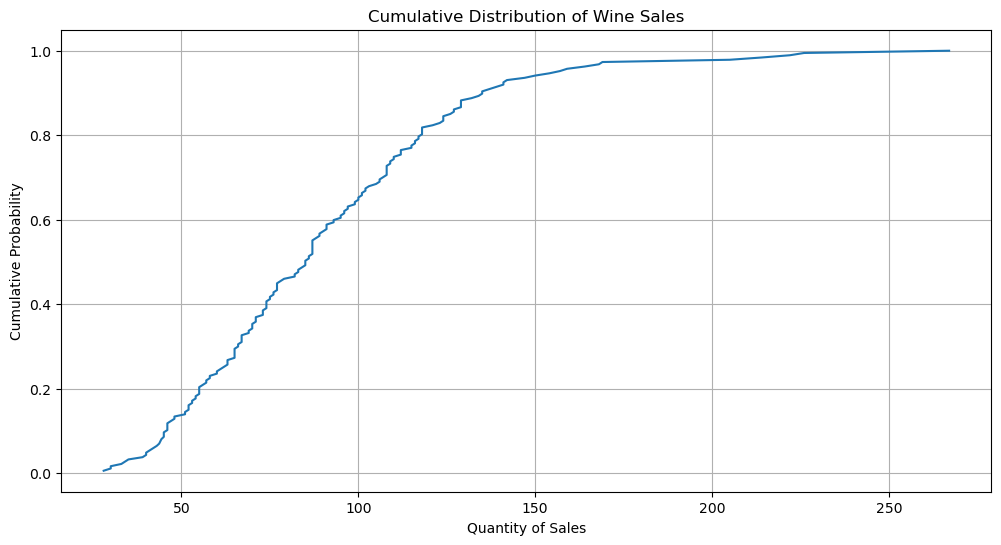

In [39]:
#ECDF - Adds up the number of observations that are there for a certain value
from statsmodels.distributions.empirical_distribution import ECDF

cdf = ECDF(df['RoseWine_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.title('Cumulative Distribution of Wine Sales')
plt.xlabel('Quantity of Sales');
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

### Plot the average sales per month and the month on month percentage change of sales

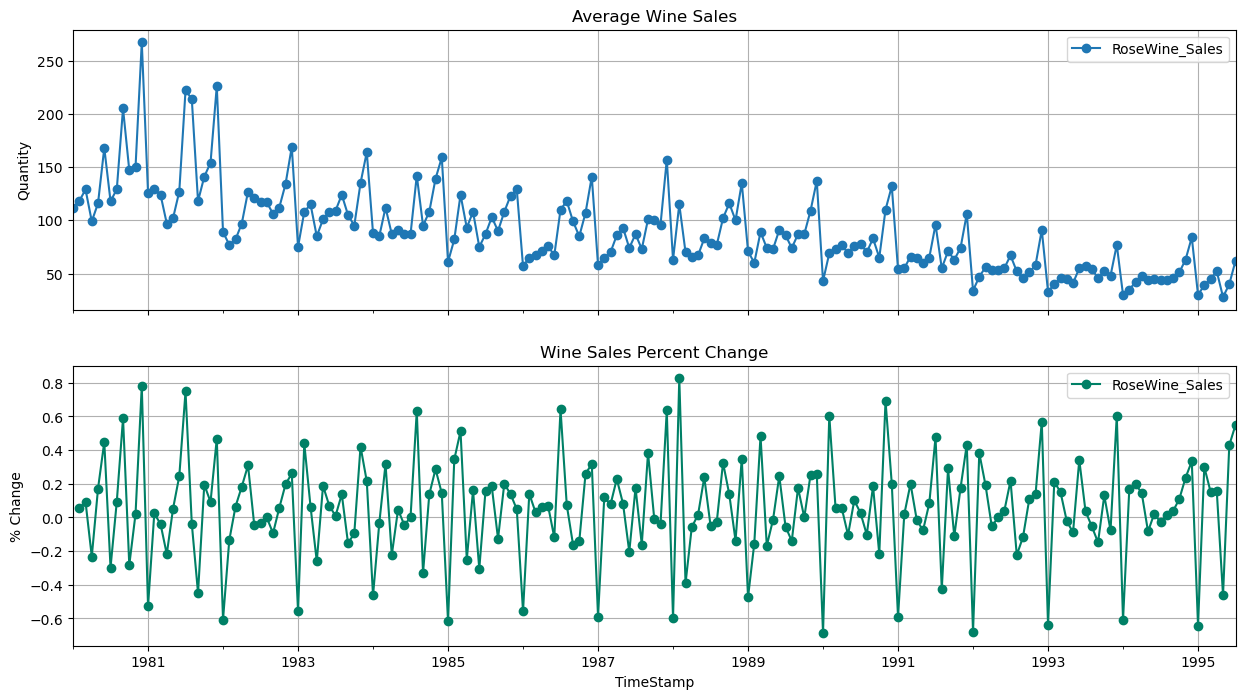

In [41]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["RoseWine_Sales"].mean()
pct_change = df.groupby(df.index)["RoseWine_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Wine Sales",grid=True, ylabel = 'Quantity')
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine Sales Percent Change",grid=True, ylabel = '% Change')

### Decomposition of time series - Additive

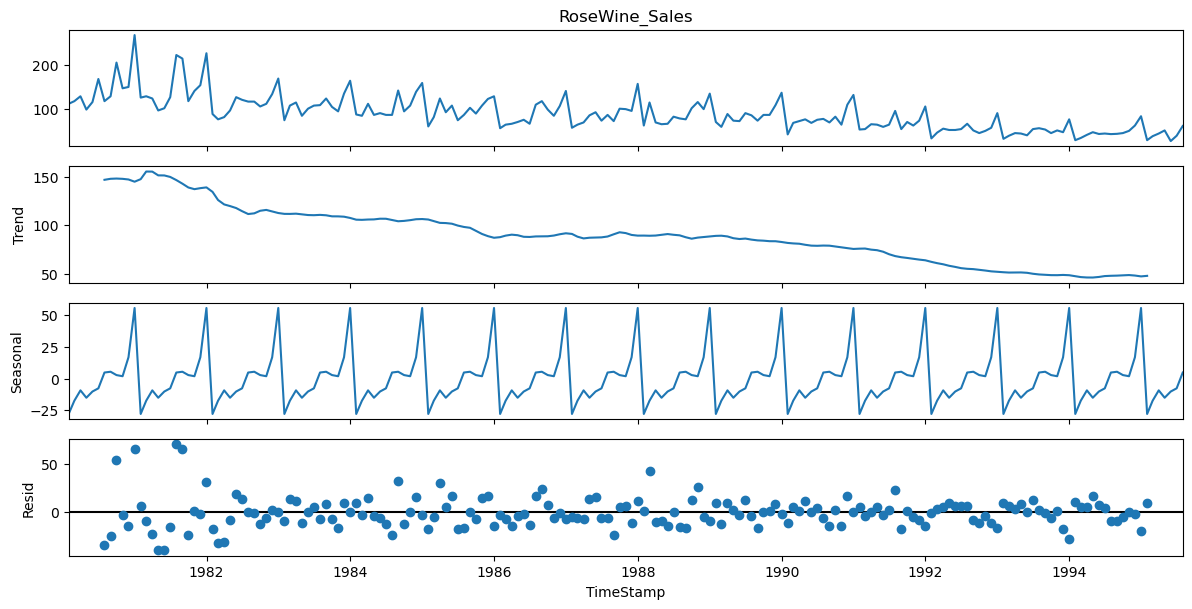

In [43]:
decomposition_add = seasonal_decompose(df['RoseWine_Sales'],model='additive')
decomposition_add.plot();
plt.xlabel('TimeStamp')
plt.show();

In [44]:
trend_add = decomposition_add.trend
seasonality_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

print('Trend','\n',trend_add.head(12),'\n')
print('Seasonality','\n',seasonality_add.head(12),'\n')
print('Residual','\n',residual_add.head(12),'\n')

Trend 
 TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 TimeStamp
1980-01-31   -27.892252
1980-02-29   -17.422041
1980-03-31    -9.268252
1980-04-30   -15.080752
1980-05-31   -10.178966
1980-06-30    -7.661109
1980-07-31     4.803952
1980-08-31     5.426762
1980-09-30     2.791081
1980-10-31     1.888304
1980-11-30    16.863304
1980-12-31    55.729970
Name: seasonal, dtype: float64 

Residual 
 TimeStamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.887286
1980-08-31   -24.551762
1980-09-30    53.833919
1980-10-31    -2.971637
1980-11-30   -14.279970
1980-12-31    66.14503

### Decomposition of time series - Multiplicative

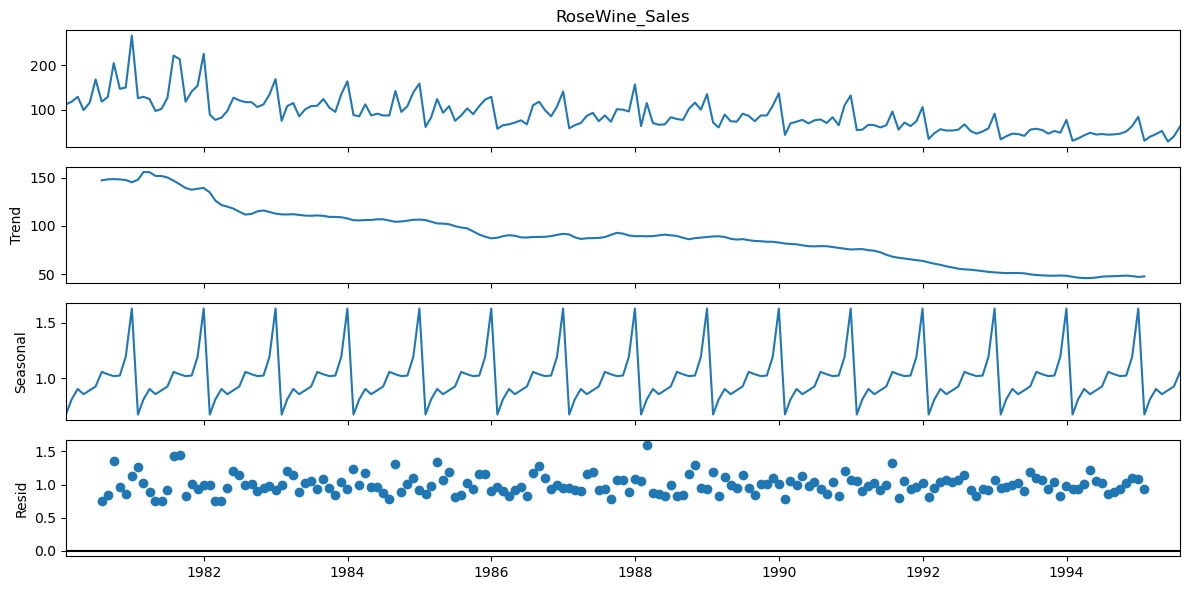

In [46]:
decomposition_mul = seasonal_decompose(df['RoseWine_Sales'],model='multiplicative')
decomposition_mul.plot();
plt.show();

In [47]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

print('Trend','\n',trend_mul.head(12),'\n')
print('Seasonality','\n',seasonality_mul.head(12),'\n')
print('Residual','\n',residual_mul.head(12),'\n')

Trend 
 TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 TimeStamp
1980-01-31    0.670320
1980-02-29    0.806375
1980-03-31    0.901501
1980-04-30    0.854411
1980-05-31    0.889760
1980-06-30    0.924324
1980-07-31    1.056071
1980-08-31    1.034338
1980-09-30    1.017959
1980-10-31    1.022915
1980-11-30    1.192781
1980-12-31    1.629244
Name: seasonal, dtype: float64 

Residual 
 TimeStamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.759671
1980-08-31    0.841974
1980-09-30    1.357259
1980-10-31    0.970446
1980-11-30    0.853069
1980-12-31    1.129231
Name: resid, dtype: fl

# Data Pre-processing

### Split the data into train and test and plot the training and test data.

In [50]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [51]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


RoseWine_Sales
TimeStamp                 
1980-01-31           112.0
1980-02-29           118.0
1980-03-31           129.0
1980-04-30            99.0
1980-05-31           116.0

Last few rows of Training Data


RoseWine_Sales
TimeStamp                 
1990-08-31            70.0
1990-09-30            83.0
1990-10-31            65.0
1990-11-30           110.0
1990-12-31           132.0

First few rows of Test Data


RoseWine_Sales
TimeStamp                 
1991-01-31            54.0
1991-02-28            55.0
1991-03-31            66.0
1991-04-30            65.0
1991-05-31            60.0

Last few rows of Test Data


RoseWine_Sales
TimeStamp                 
1995-03-31            45.0
1995-04-30            52.0
1995-05-31            28.0
1995-06-30            40.0
1995-07-31            62.0

In [52]:
#Complete the code to check the shape of train and test sets
print('Shape of Train data: ',train.shape)
print('Shape of Test data: ',test.shape)
print('Total Observations in dataset: ',test.shape[0]+train.shape[0])

Shape of Train data:  (132, 1)
Shape of Test data:  (55, 1)
Total Observations in dataset:  187


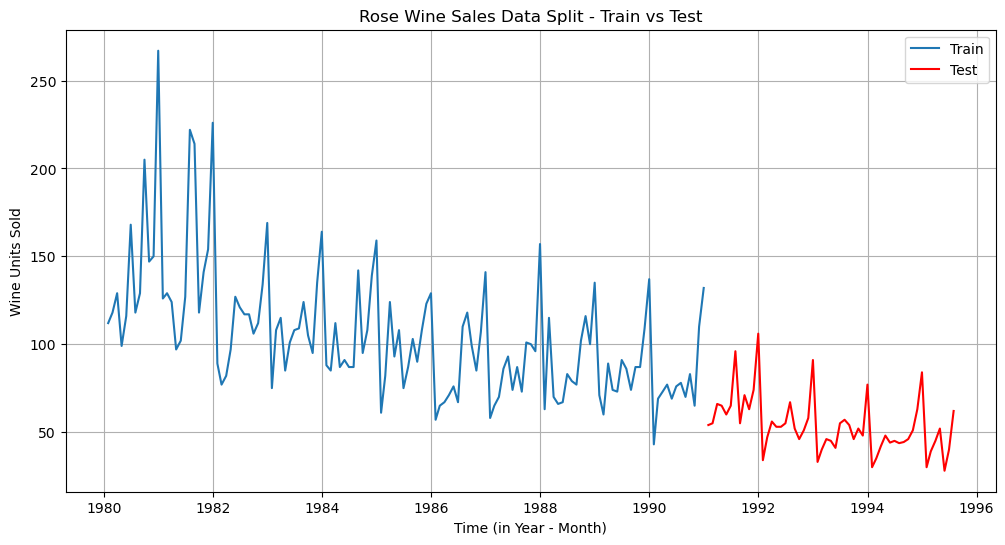

In [53]:
plt.plot(train['RoseWine_Sales'], label = 'Train')
plt.plot(test['RoseWine_Sales'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Time (in Year - Month)')
plt.ylabel('Wine Units Sold')
plt.title('Rose Wine Sales Data Split - Train vs Test', fontsize = 12)
plt.show;
plt.grid();

# Model Building - Original Data

### 1a. Linear Regression - Model Building

In [56]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [57]:
lr_train = train.copy()
lr_test = test.copy()

In [58]:
lr_train['Time'] = train_time
lr_test['Time'] = test_time

print('First few rows of Training Data','\n',lr_train.head(),'\n')
print('Last few rows of Training Data','\n',lr_train.tail(),'\n')
print('First few rows of Test Data','\n',lr_test.head(),'\n')
print('Last few rows of Test Data','\n',lr_test.tail(),'\n')

First few rows of Training Data 
             RoseWine_Sales  Time
TimeStamp                       
1980-01-31           112.0     1
1980-02-29           118.0     2
1980-03-31           129.0     3
1980-04-30            99.0     4
1980-05-31           116.0     5 

Last few rows of Training Data 
             RoseWine_Sales  Time
TimeStamp                       
1990-08-31            70.0   128
1990-09-30            83.0   129
1990-10-31            65.0   130
1990-11-30           110.0   131
1990-12-31           132.0   132 

First few rows of Test Data 
             RoseWine_Sales  Time
TimeStamp                       
1991-01-31            54.0   132
1991-02-28            55.0   133
1991-03-31            66.0   134
1991-04-30            65.0   135
1991-05-31            60.0   136 

Last few rows of Test Data 
             RoseWine_Sales  Time
TimeStamp                       
1995-03-31            45.0   182
1995-04-30            52.0   183
1995-05-31            28.0   184
1995-06-30

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(lr_train[['Time']],lr_train['RoseWine_Sales'].values)

LinearRegression()

In [61]:
pred_train_lr = lr.predict(lr_train[['Time']])
lr_train['RegressionOnTime_pred'] = pred_train_lr

pred_test_lr = lr.predict(lr_test[['Time']])
lr_test['RegressionOnTime_pred'] = pred_test_lr
lr_test.head()

RoseWine_Sales  Time  RegressionOnTime_pred
TimeStamp                                              
1991-01-31            54.0   132              72.557644
1991-02-28            55.0   133              72.063266
1991-03-31            66.0   134              71.568888
1991-04-30            65.0   135              71.074511
1991-05-31            60.0   136              70.580133

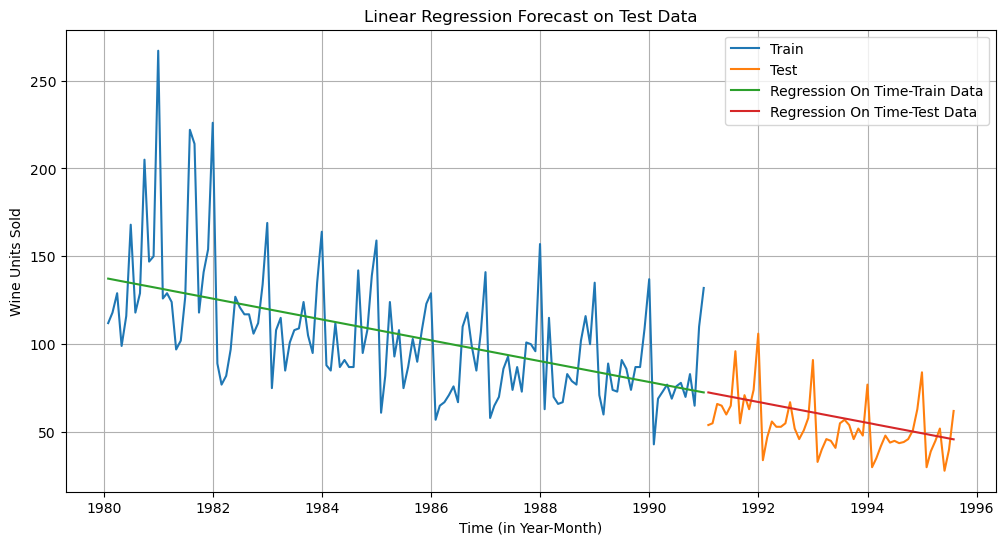

In [62]:
plt.title('Linear Regression Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(train['RoseWine_Sales'], label='Train')
plt.plot(test['RoseWine_Sales'], label='Test')
plt.plot(lr_train['RegressionOnTime_pred'], label='Regression On Time-Train Data')
plt.plot(lr_test['RegressionOnTime_pred'], label='Regression On Time-Test Data')
plt.legend(loc='best')
plt.grid();

### 1b. Linear Regression - Model Evaluation

In [64]:
rmse_lr = metrics.root_mean_squared_error(test['RoseWine_Sales'],lr_test['RegressionOnTime_pred'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_lr))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.457


In [65]:
df_rmse = pd.DataFrame({'Test RMSE': [rmse_lr]},index=['Linear Regression'])
df_rmse

Test RMSE
Linear Regression  15.457444

### 2a. Naive Forecast - Model Building

In [67]:
nf_train = train.copy()
nf_test = test.copy()

In [68]:
#Taking the last value in the train data
nf_test['NaiveModel_pred'] = np.asarray(train['RoseWine_Sales'])[len(np.asarray(train['RoseWine_Sales']))-1]
nf_test.head()

RoseWine_Sales  NaiveModel_pred
TimeStamp                                  
1991-01-31            54.0            132.0
1991-02-28            55.0            132.0
1991-03-31            66.0            132.0
1991-04-30            65.0            132.0
1991-05-31            60.0            132.0

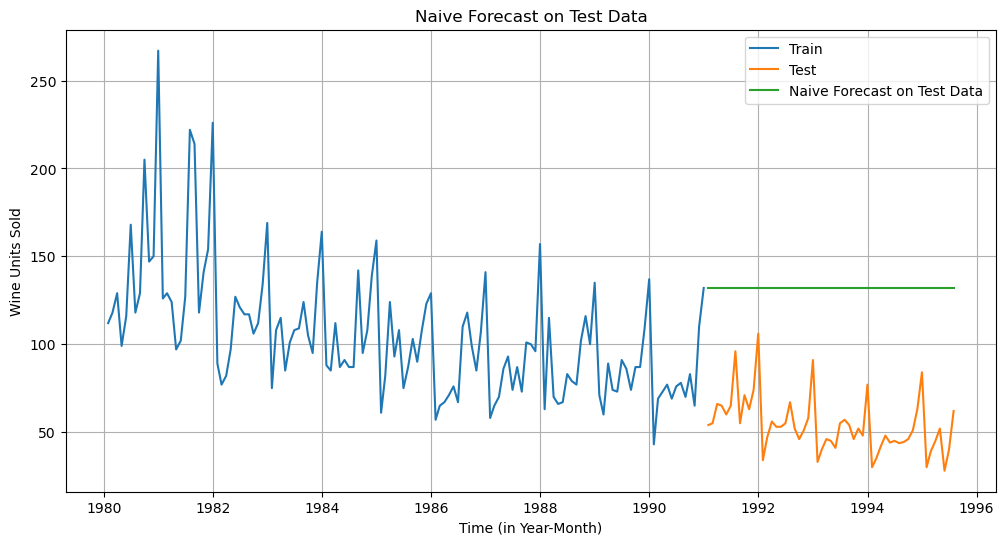

In [69]:
plt.title('Naive Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(nf_train['RoseWine_Sales'], label='Train')
plt.plot(nf_test['RoseWine_Sales'], label='Test')
plt.plot(nf_test['NaiveModel_pred'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

### 2b. Naive Forecast - Model Evaluation

In [71]:
rmse_nf = metrics.root_mean_squared_error(test['RoseWine_Sales'],nf_test['NaiveModel_pred'])
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_nf))

For Naive forecast on the Test Data,  RMSE is 79.778


In [72]:
df_rmse_nf = pd.DataFrame({'Test RMSE': [rmse_nf]},index=['Naive Model'])

df_rmse = pd.concat([df_rmse, df_rmse_nf])
df_rmse

Test RMSE
Linear Regression  15.457444
Naive Model        79.778066

### 3a. Simple Average - Model Building

In [74]:
sa_train = train.copy()
sa_test = test.copy()

In [75]:
sa_test['SimpleAverage_pred'] = train['RoseWine_Sales'].mean()
sa_test.head()

RoseWine_Sales  SimpleAverage_pred
TimeStamp                                     
1991-01-31            54.0          104.939394
1991-02-28            55.0          104.939394
1991-03-31            66.0          104.939394
1991-04-30            65.0          104.939394
1991-05-31            60.0          104.939394

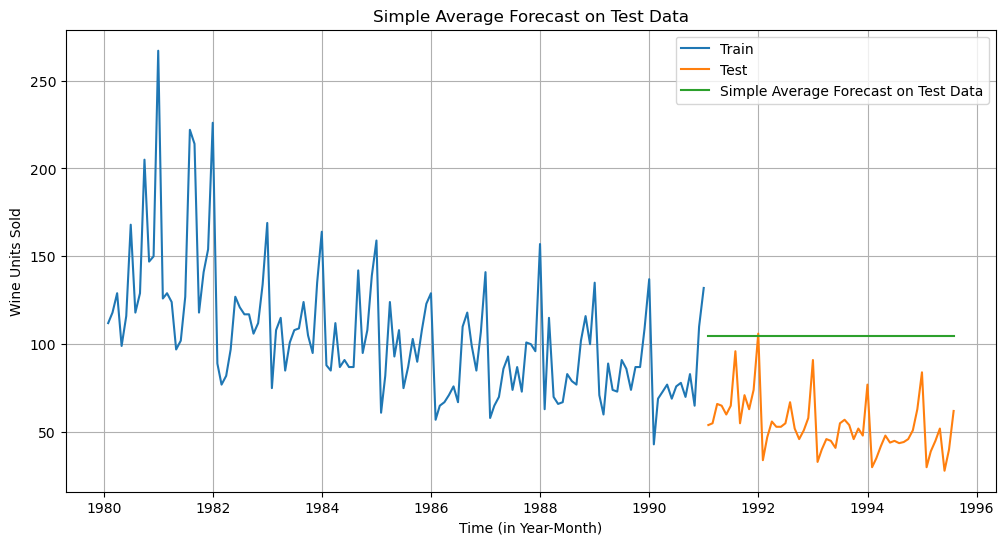

In [76]:
plt.title('Simple Average Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(sa_train['RoseWine_Sales'], label='Train')
plt.plot(sa_test['RoseWine_Sales'], label='Test')
plt.plot(sa_test['SimpleAverage_pred'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

### 3b. Simple Average - Model Evaluation

In [78]:
rmse_sa = metrics.root_mean_squared_error(test['RoseWine_Sales'],sa_test['SimpleAverage_pred'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_sa))

For Simple Average forecast on the Test Data,  RMSE is 53.522


In [79]:
df_rmse_sa = pd.DataFrame({'Test RMSE': [rmse_sa]},index=['Simple Average'])

df_rmse = pd.concat([df_rmse, df_rmse_sa])
df_rmse

Test RMSE
Linear Regression  15.457444
Naive Model        79.778066
Simple Average     53.521557

### 4a. Moving Average - Model Building

In [81]:
ma_df = df.copy()
ma_df.head()

RoseWine_Sales
TimeStamp                 
1980-01-31           112.0
1980-02-29           118.0
1980-03-31           129.0
1980-04-30            99.0
1980-05-31           116.0

In [82]:
ma_df['Trailing_2'] = ma_df['RoseWine_Sales'].rolling(2).mean()
ma_df['Trailing_4'] = ma_df['RoseWine_Sales'].rolling(4).mean()
ma_df['Trailing_6'] = ma_df['RoseWine_Sales'].rolling(6).mean()
ma_df['Trailing_9'] = ma_df['RoseWine_Sales'].rolling(9).mean()

ma_df.head(9)

RoseWine_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
TimeStamp                                                                 
1980-01-31           112.0         NaN         NaN         NaN         NaN
1980-02-29           118.0       115.0         NaN         NaN         NaN
1980-03-31           129.0       123.5         NaN         NaN         NaN
1980-04-30            99.0       114.0      114.50         NaN         NaN
1980-05-31           116.0       107.5      115.50         NaN         NaN
1980-06-30           168.0       142.0      128.00  123.666667         NaN
1980-07-31           118.0       143.0      125.25  124.666667         NaN
1980-08-31           129.0       123.5      132.75  126.500000         NaN
1980-09-30           205.0       167.0      155.00  139.166667  132.666667

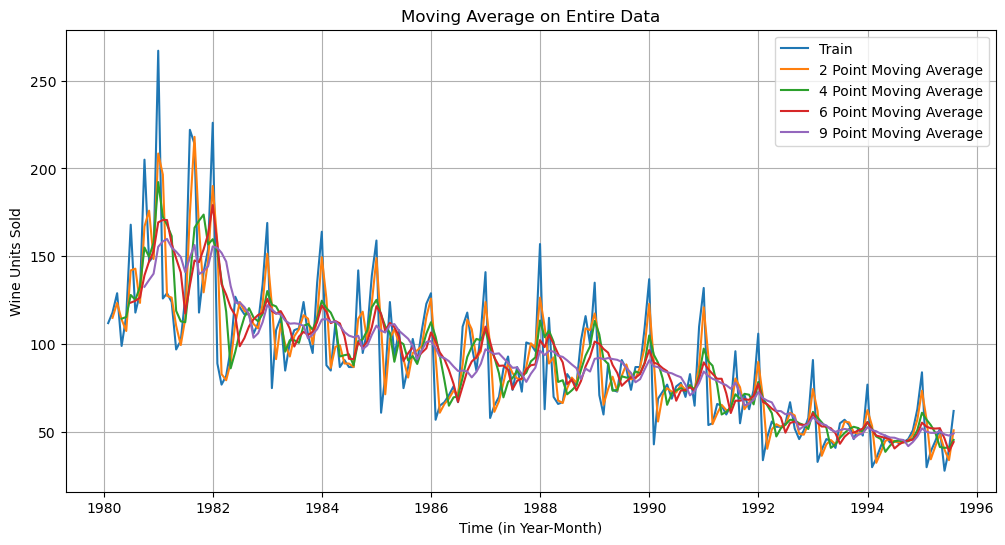

In [83]:
#Plotting on the whole data

plt.plot(ma_df['RoseWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_2'], label='2 Point Moving Average')
plt.plot(ma_df['Trailing_4'], label='4 Point Moving Average')
plt.plot(ma_df['Trailing_6'],label = '6 Point Moving Average')
plt.plot(ma_df['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

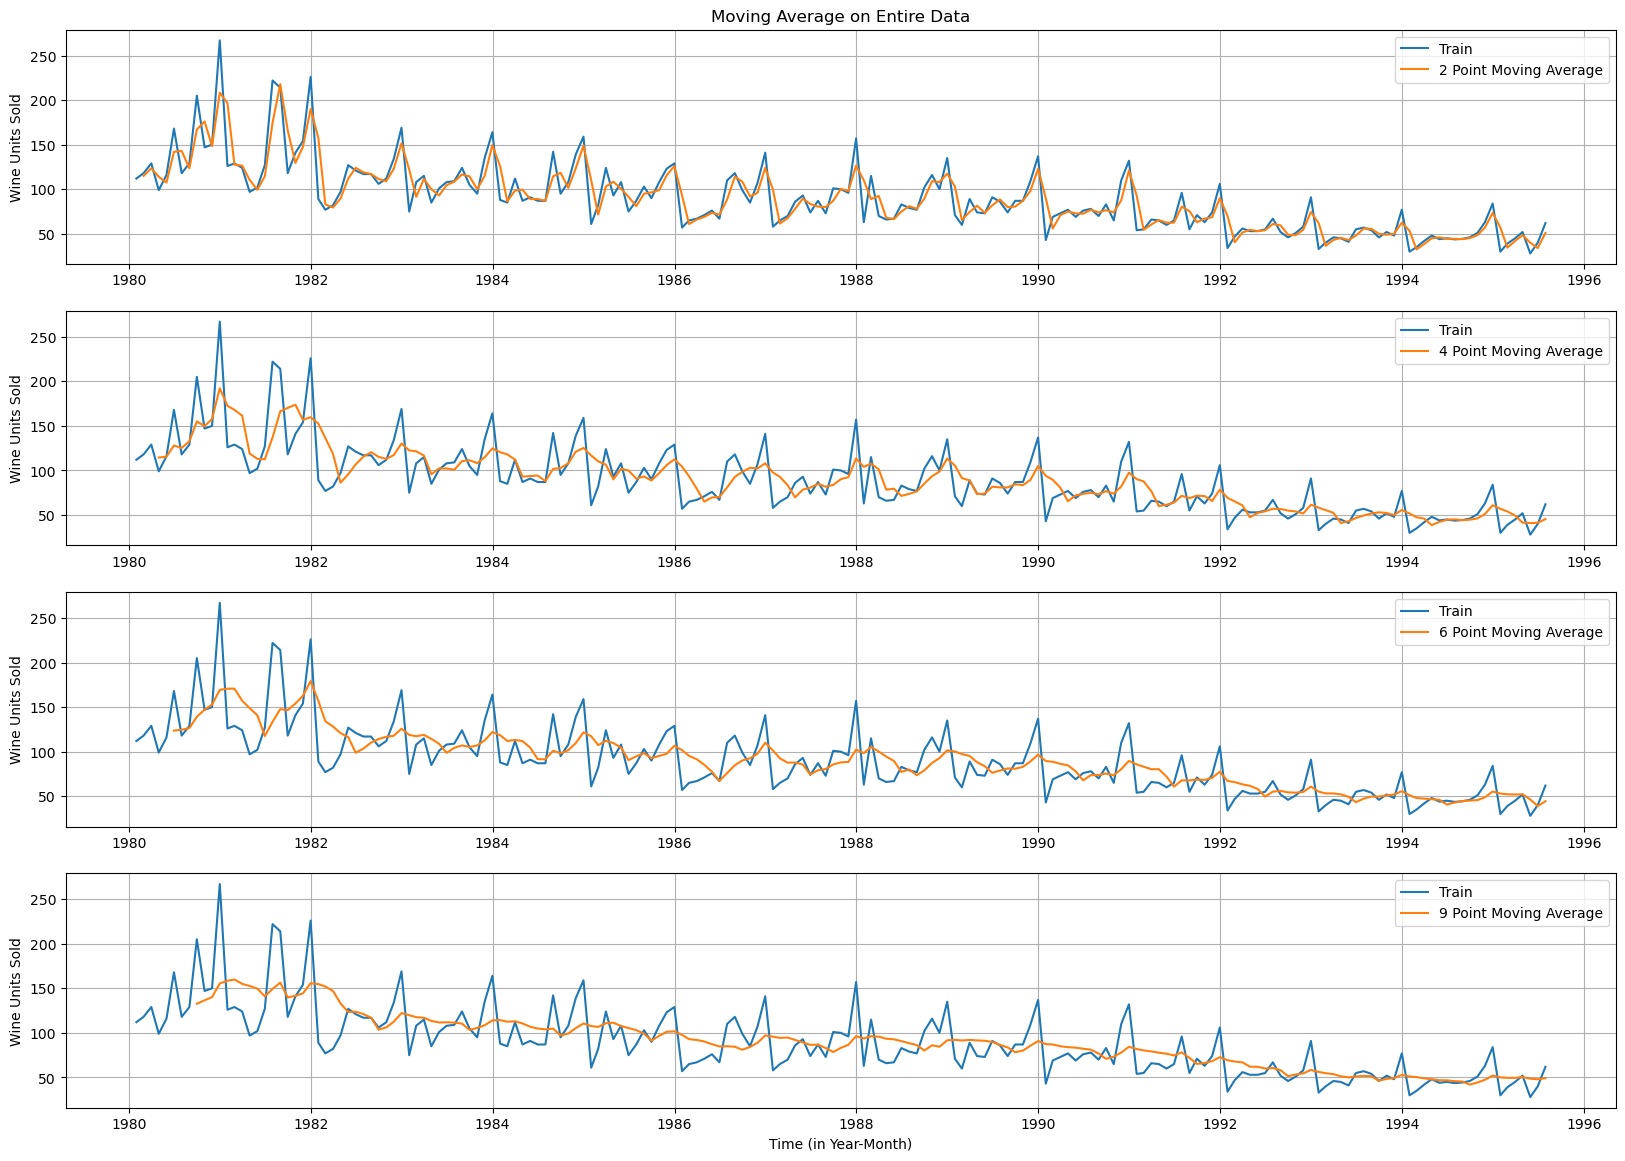

In [84]:
#Plotting on the whole data separately
plt.figure(figsize=(20,14))

plt.subplot(4,1,1)
plt.plot(ma_df['RoseWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_2'], label='2 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,2)
plt.plot(ma_df['RoseWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_4'], label='4 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,3)
plt.plot(ma_df['RoseWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_6'],label = '6 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,4)
plt.plot(ma_df['RoseWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_9'],label = '9 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.xlabel('Time (in Year-Month)')
plt.legend(loc = 'best')

plt.grid();

In [85]:
#Creating train and test set 
tma_train = ma_df[ma_df.index.year < 1991]
tma_test = ma_df[ma_df.index.year >= 1991]

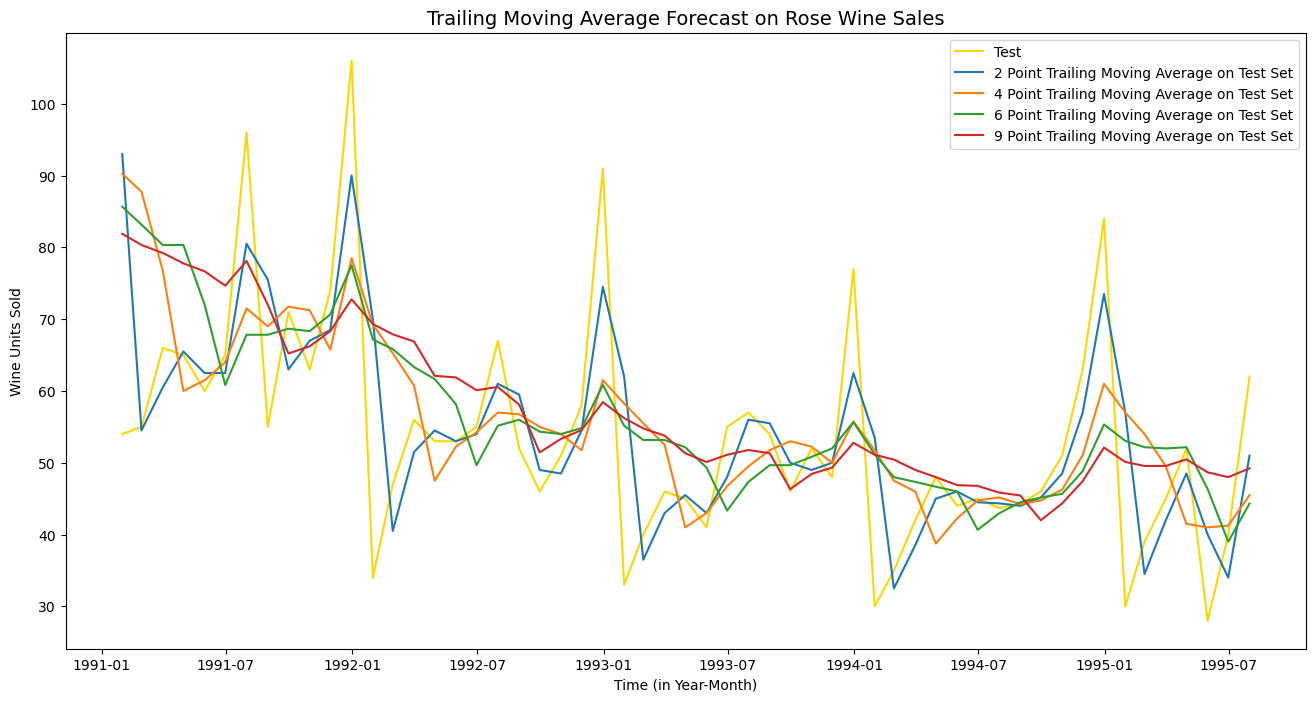

In [86]:
plt.figure(figsize=(16,8))
#plt.plot(tma_train['RoseWine_Sales'], label='Train', color = 'violet')
plt.plot(tma_test['RoseWine_Sales'], label='Test', color = 'gold')

plt.plot(tma_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(tma_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(tma_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
plt.plot(tma_test['Trailing_9'], label='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.title("Trailing Moving Average Forecast on Rose Wine Sales", fontsize=14)
plt.show();

### 4b. Moving Average - Model Evaluation

In [88]:
# Test Data - RMSE --> 2 point Trailing MA
rmse_TMA2 = metrics.root_mean_squared_error(test['RoseWine_Sales'],tma_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_TMA2))

# Test Data - RMSE --> 4 point Trailing MA
rmse_TMA4 = metrics.root_mean_squared_error(test['RoseWine_Sales'],tma_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_TMA4))

# Test Data - RMSE --> 6 point Trailing MA
rmse_TMA6 = metrics.root_mean_squared_error(test['RoseWine_Sales'],tma_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_TMA6))

# Test Data - RMSE --> 9 point Trailing MA
rmse_TMA9 = metrics.root_mean_squared_error(test['RoseWine_Sales'],tma_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_TMA9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.462
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.587
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.740


In [89]:
df_rmse_ma = pd.DataFrame({'Test RMSE': [rmse_TMA2,rmse_TMA4,rmse_TMA6,rmse_TMA9]},index=['Moving Average - 2 point Trailing','Moving Average - 4 point Trailing','Moving Average - 6 point Trailing','Moving Average - 9 point Trailing'])

df_rmse = pd.concat([df_rmse, df_rmse_ma])
df_rmse

# 2 Point Trailing MA seems to be the best out of all since it has the least RMSE

Test RMSE
Linear Regression                  15.457444
Naive Model                        79.778066
Simple Average                     53.521557
Moving Average - 2 point Trailing  11.530180
Moving Average - 4 point Trailing  14.462330
Moving Average - 6 point Trailing  14.586916
Moving Average - 9 point Trailing  14.740112

#### Model Comparison Plots - Regression, Naive, SA, MA(2)

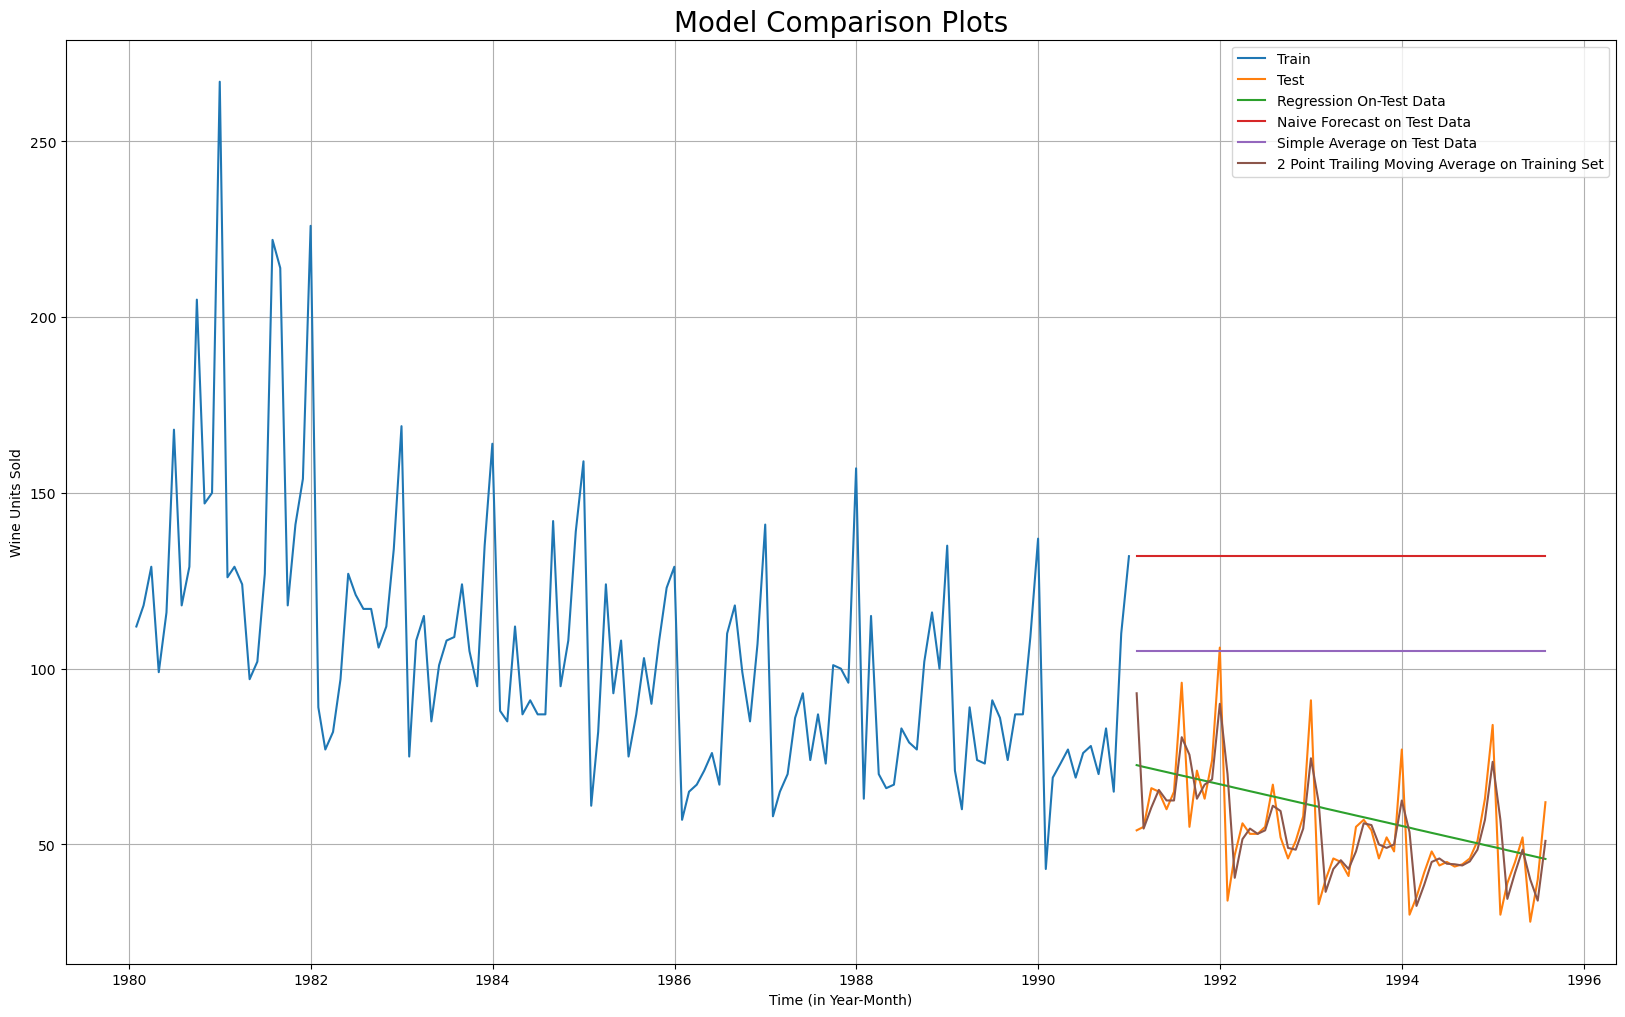

In [91]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,12))

plt.plot(train['RoseWine_Sales'], label='Train')
plt.plot(test['RoseWine_Sales'], label='Test')

plt.plot(lr_test['RegressionOnTime_pred'], label='Regression On-Test Data')

plt.plot(nf_test['NaiveModel_pred'], label='Naive Forecast on Test Data')

plt.plot(sa_test['SimpleAverage_pred'], label='Simple Average on Test Data')

plt.plot(tma_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots",fontsize=20)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

### 5a. Simple Exponential Smoothing (Autofit) - Model Building

In [93]:
ses_train = train.copy()
ses_test = test.copy()

In [94]:
ses = SimpleExpSmoothing(ses_train['RoseWine_Sales'])

In [95]:
ses_autofit = ses.fit(optimized=True)
ses_autofit.params

{'smoothing_level': 0.12362013444181875,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
ses_test['SES_pred'] = ses_autofit.forecast(steps=len(test))
ses_test.head()

RoseWine_Sales   SES_pred
TimeStamp                            
1991-01-31            54.0  87.983765
1991-02-28            55.0  87.983765
1991-03-31            66.0  87.983765
1991-04-30            65.0  87.983765
1991-05-31            60.0  87.983765

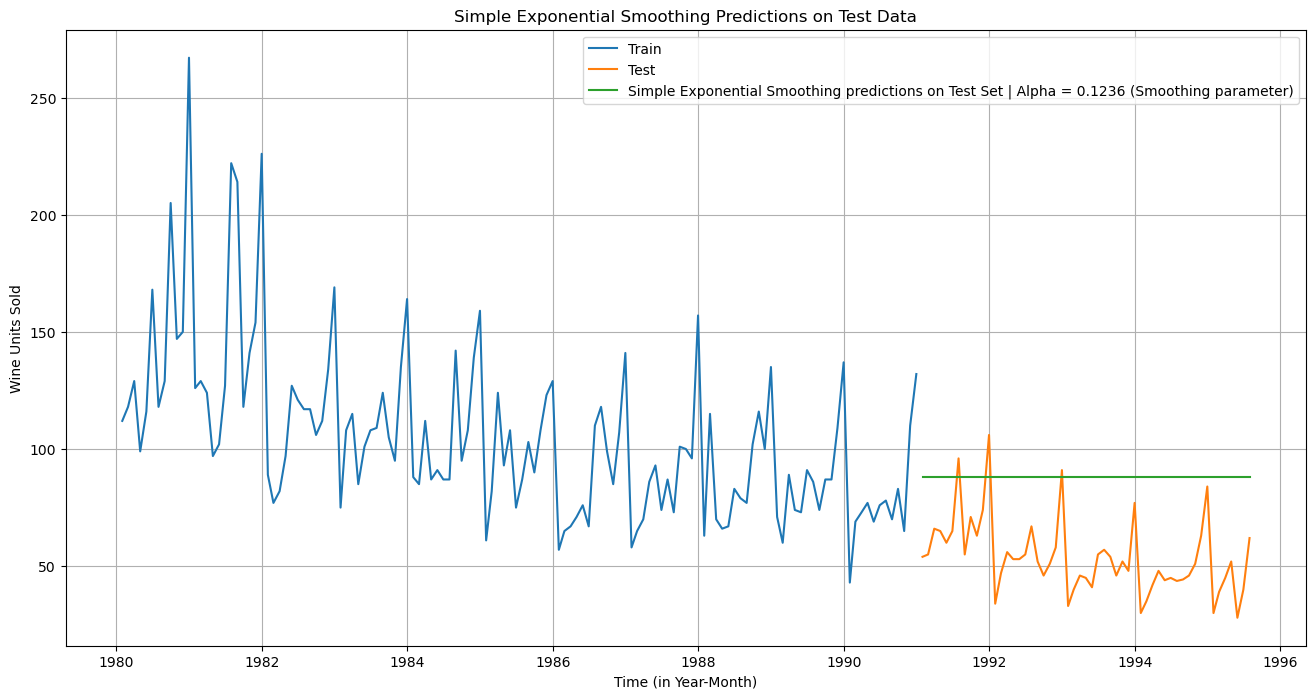

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(ses_train['RoseWine_Sales'], label='Train')
plt.plot(ses_test['RoseWine_Sales'], label='Test')
plt.plot(ses_test['SES_pred'], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.1236 (Smoothing parameter)')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 5b. Simple Exponential Smoothing - Model Evaluation

In [99]:
rmse_ses = metrics.root_mean_squared_error(test['RoseWine_Sales'],ses_test['SES_pred'])
print("For Simple Exponential Smoothing Model forecast (Alpha = 0.1236) on the Test Data,  RMSE is %3.3f" %(rmse_ses))

For Simple Exponential Smoothing Model forecast (Alpha = 0.1236) on the Test Data,  RMSE is 37.655


In [100]:
df_rmse_ses = pd.DataFrame({'Test RMSE': [rmse_ses]},index=['Simple Exponential Smoothing (autofit) | Alpha = 0.1236'])

df_rmse = pd.concat([df_rmse, df_rmse_ses])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503

### 6a. Simple Exponential Smoothing (Manual) - Model Building

In [102]:
df_rmse_ses_manual = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
df_rmse_ses_manual

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [103]:
%%time
for i in np.arange(0.1,1,0.05):
    ses_manual = ses.fit(smoothing_level=i,optimized=False,use_brute=True)
    ses_test['SES_pred',i] = ses_manual.forecast(steps=len(test))
    rmse_ses_manual = metrics.root_mean_squared_error(ses_test['RoseWine_Sales'], ses_test['SES_pred',i])
    df_ses_manual_temp = pd.DataFrame({'Alpha Values': i,'Test RMSE': rmse_ses_manual},index=[i])
    df_rmse_ses_manual = pd.concat([df_rmse_ses_manual, df_ses_manual_temp])

df_rmse_ses_manual.sort_values(by=['Test RMSE'],ascending=True)
print('Top 5 Alpha Values with least RMSE:-\n')
df_rmse_ses_manual.head()

Top 5 Alpha Values with least RMSE:-

CPU times: total: 562 ms
Wall time: 1.02 s


Alpha Values  Test RMSE
0.10          0.10  36.890375
0.15          0.15  38.784334
0.20          0.20  41.423877
0.25          0.25  44.422545
0.30          0.30  47.566302

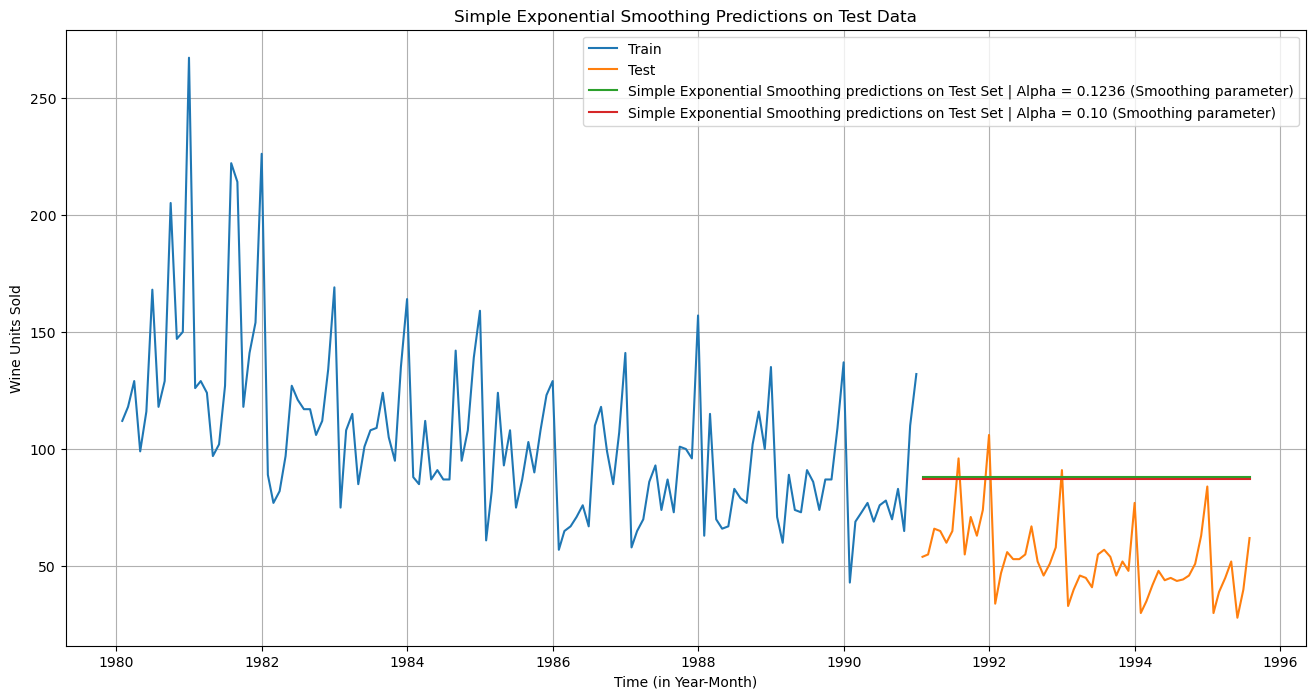

In [104]:
#Plotting on both the Training and Test data

#Fitting the model again with alpha = 0.10 since it has the least RMSE
ses_manual_i = ses.fit(smoothing_level=0.1,optimized=False,use_brute=True)
ses_test['SES_pred',0.1] = ses_manual_i.forecast(steps=len(test))

plt.figure(figsize=(16,8))
plt.plot(ses_train['RoseWine_Sales'], label='Train')
plt.plot(ses_test['RoseWine_Sales'], label='Test')
plt.plot(ses_test['SES_pred'], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.1236 (Smoothing parameter)')
plt.plot(ses_test['SES_pred',0.1], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.10 (Smoothing parameter)')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 6b. Simple Exponential Smoothing (Manual) - Model Evaluation

In [106]:
rmse_ses_manual = metrics.root_mean_squared_error(test['RoseWine_Sales'],ses_test['SES_pred',0.1])
print("For Simple Exponential Smoothing Model forecast (Alpha = 0.10) on the Test Data,  RMSE is %3.3f" %(rmse_ses_manual))

For Simple Exponential Smoothing Model forecast (Alpha = 0.10) on the Test Data,  RMSE is 36.890


In [107]:
df_rmse_ses_manual = pd.DataFrame({'Test RMSE': [rmse_ses_manual]},index=['Simple Exponential Smoothing (manual) | Alpha = 0.10'])

df_rmse = pd.concat([df_rmse, df_rmse_ses_manual])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375

### 7a. Double Exponential Smoothing (Autofit) - Model Building

In [109]:
des_train = train.copy()
des_test = test.copy()

In [110]:
# Initializing the Double Exponential Smoothing Model
des = Holt(des_train,initialization_method='estimated')
# Fitting the model
des = des.fit()
des.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.6610391146660035e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81553690867275,
 'initial_trend': -0.4943781897068274,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [111]:
# Forecasting using this model for the test set
des_test['DES_pred'] =  des.forecast(len(test))
des_test.head()

RoseWine_Sales   DES_pred
TimeStamp                            
1991-01-31            54.0  72.063238
1991-02-28            55.0  71.568859
1991-03-31            66.0  71.074481
1991-04-30            65.0  70.580103
1991-05-31            60.0  70.085725

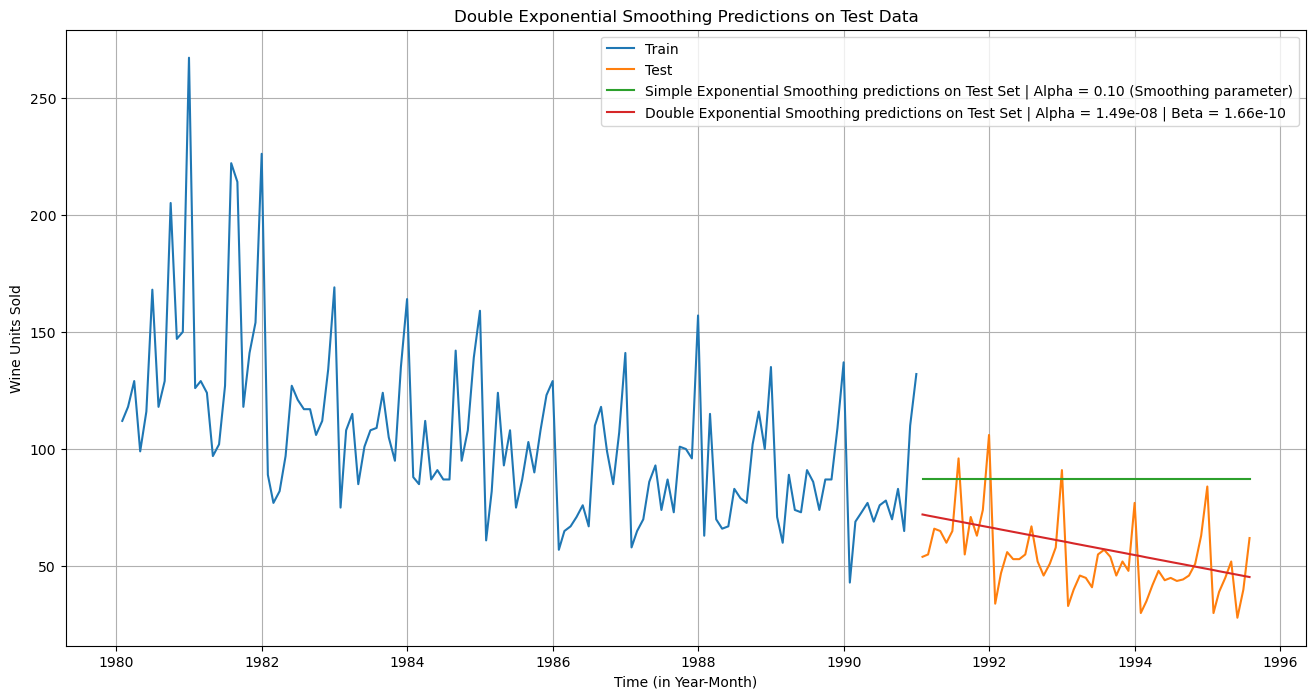

In [112]:
#Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(des_train['RoseWine_Sales'], label='Train')
plt.plot(des_test['RoseWine_Sales'], label='Test')
plt.plot(ses_test['SES_pred',0.1], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.10 (Smoothing parameter)')
plt.plot(des_test['DES_pred'], label='Double Exponential Smoothing predictions on Test Set | Alpha = 1.49e-08 | Beta = 1.66e-10')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 7b. Double Exponential Smoothing (Autofit) - Model Evaluation

In [114]:
rmse_des = metrics.root_mean_squared_error(test['RoseWine_Sales'],des_test['DES_pred'])
print("For Double Exponential Smoothing Model forecast (Alpha = 1.49e-08, Beta = 1.66e-10) on the Test Data,  RMSE is %3.3f" %(rmse_des))

For Double Exponential Smoothing Model forecast (Alpha = 1.49e-08, Beta = 1.66e-10) on the Test Data,  RMSE is 15.291


In [115]:
df_rmse_des = pd.DataFrame({'Test RMSE': [rmse_des]},index=['Double Exponential Smoothing (autofit) | Alpha = 1.49e-08 | Beta = 1.66e-10'])

df_rmse = pd.concat([df_rmse, df_rmse_des])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Double Exponential Smoothing (autofit) | Alpha ...  15.291448

### 8a. Double Exponential Smoothing (Manual) - Model Building

In [117]:
## First we will define an empty dataframe to store our values from the loop

df_rmse_des_manual = pd.DataFrame({'Alpha':[],'Beta':[],'Test RMSE': []})
df_rmse_des_manual

Empty DataFrame
Columns: [Alpha, Beta, Test RMSE]
Index: []

In [118]:
%%time
model_des = Holt(des_train['RoseWine_Sales'],initialization_method='estimated')
for i in np.arange(0.05,1.05,0.05):
    for j in np.arange(0.05,1.05,0.05):
        des_manual = model_des.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        des_test['DES_pred',i,j] = des_manual.forecast(len(test))
        rmse_des_manual = metrics.root_mean_squared_error(des_test['RoseWine_Sales'], des_test['DES_pred',i,j])
        df_des_manual_temp = pd.DataFrame({'Alpha': i,'Beta': j,'Test RMSE': rmse_des_manual},index=[j])
        df_rmse_des_manual = pd.concat([df_rmse_des_manual, df_des_manual_temp])

df_rmse_des_manual

CPU times: total: 9.42 s
Wall time: 10.6 s


Alpha  Beta   Test RMSE
0.05   0.05  0.05   30.907779
0.10   0.05  0.10   35.642444
0.15   0.05  0.15   22.659851
0.20   0.05  0.20   38.294175
0.25   0.05  0.25   35.106059
...     ...   ...         ...
0.80   1.00  0.80  854.038055
0.85   1.00  0.85  848.555999
0.90   1.00  0.90  834.783438
0.95   1.00  0.95  812.185433
1.00   1.00  1.00  780.152032

[400 rows x 3 columns]

In [119]:
print('Top 5 Alpha-Beta Values with least RMSE:-\n')
df_rmse_des_manual.sort_values(by=['Test RMSE']).head()

Top 5 Alpha-Beta Values with least RMSE:-



Alpha  Beta  Test RMSE
0.35   0.05  0.35  15.670743
0.30   0.05  0.30  18.480365
0.15   0.05  0.15  22.659851
0.05   0.05  0.05  30.907779
0.40   0.05  0.40  31.137095

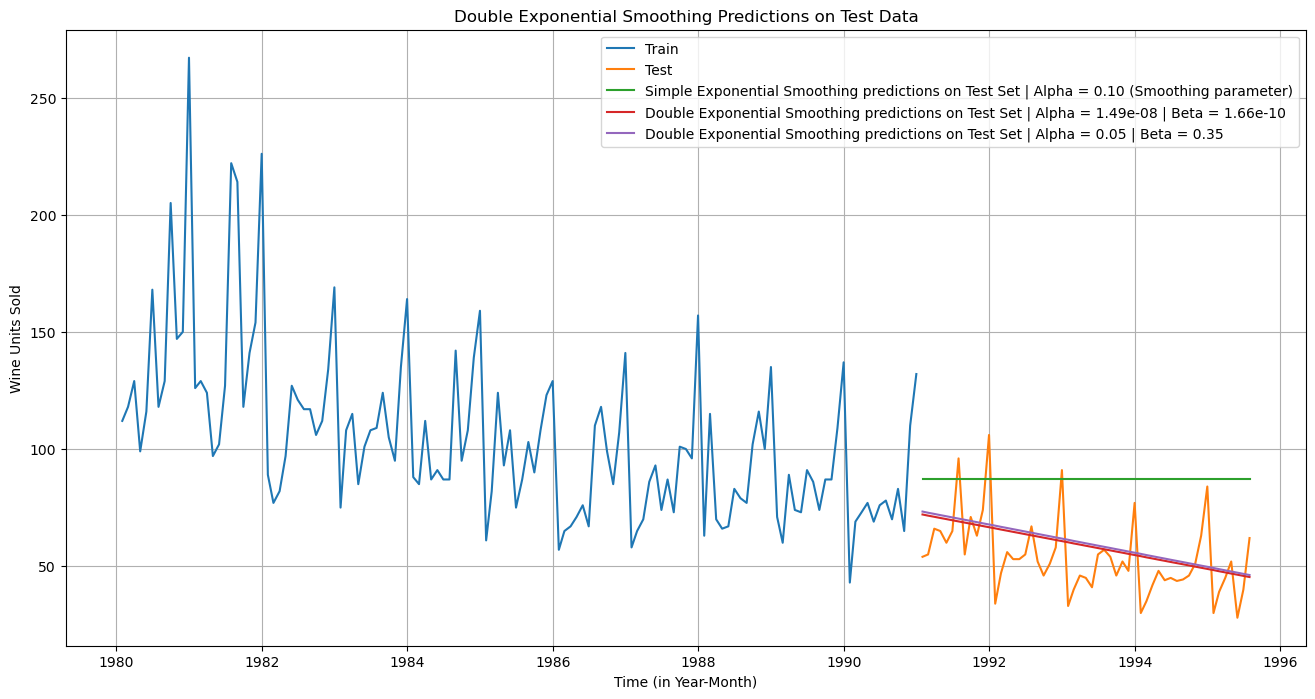

In [120]:
#Plotting on both the Training and Test data

#Fitting the model again with alpha = 0.05 & Beta = 0.35 since it has the least RMSE
des_manual_i_j = model_des.fit(smoothing_level=0.05,smoothing_trend=0.35,optimized=False,use_brute=True)
des_test['DES_pred',0.05,0.35] = des_manual_i_j.forecast(steps=len(test))

plt.figure(figsize=(16,8))
plt.plot(des_train['RoseWine_Sales'], label='Train')
plt.plot(des_test['RoseWine_Sales'], label='Test')
plt.plot(ses_test['SES_pred',0.1], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.10 (Smoothing parameter)')
plt.plot(des_test['DES_pred'], label='Double Exponential Smoothing predictions on Test Set | Alpha = 1.49e-08 | Beta = 1.66e-10')
plt.plot(des_test['DES_pred',0.05,0.35], label='Double Exponential Smoothing predictions on Test Set | Alpha = 0.05 | Beta = 0.35')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 8b. Double Exponential Smoothing (Manual) - Model Evaluation

In [122]:
rmse_des_manual = metrics.root_mean_squared_error(test['RoseWine_Sales'],des_test['DES_pred',0.05,0.35])
print("For Double Exponential Smoothing Model forecast (Alpha = 0.05, Beta = 0.35) on the Test Data,  RMSE is %3.3f" %(rmse_des_manual))

For Double Exponential Smoothing Model forecast (Alpha = 0.05, Beta = 0.35) on the Test Data,  RMSE is 15.671


In [123]:
df_rmse_des_manual = pd.DataFrame({'Test RMSE': [rmse_des_manual]},index=['Double Exponential Smoothing (manual) | Alpha = 0.05 | Beta = 0.35'])

df_rmse = pd.concat([df_rmse, df_rmse_des_manual])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Double Exponential Smoothing (autofit) | Alpha ...  15.291448
Double Exponential Smoothing (manual) | Alpha =...  15.670743

### 9a. Triple Exponential Smoothing (Autofit) - Model Building

In [125]:
tes_train = train.copy()
tes_test = test.copy()

In [126]:
tes_aa = ExponentialSmoothing(tes_train['RoseWine_Sales'],trend='additive',seasonal='additive',initialization_method='estimated',freq='M')
tes_am = ExponentialSmoothing(tes_train['RoseWine_Sales'],trend='additive',seasonal='multiplicative',initialization_method='estimated',freq='M')
tes_ma = ExponentialSmoothing(tes_train['RoseWine_Sales'],trend='multiplicative',seasonal='additive',initialization_method='estimated',freq='M')
tes_mm = ExponentialSmoothing(tes_train['RoseWine_Sales'],trend='multiplicative',seasonal='multiplicative',initialization_method='estimated',freq='M')
tes_nm = ExponentialSmoothing(tes_train['RoseWine_Sales'],seasonal='multiplicative',initialization_method='estimated',freq='M')
tes_na = ExponentialSmoothing(tes_train['RoseWine_Sales'],seasonal='additive',initialization_method='estimated',freq='M')
#tes = ExponentialSmoothing(tes_train['RoseWine_Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [127]:
tes_aa.fit().params

{'smoothing_level': 0.08954054664605082,
 'smoothing_trend': 0.0002400108693915795,
 'smoothing_seasonal': 0.003466872515750747,
 'damping_trend': nan,
 'initial_level': 146.5570157826235,
 'initial_trend': -0.547196983509005,
 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
        -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
          4.79381122,   2.96110122,  21.05738849,  63.18279918]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [128]:
tes_am.fit().params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [129]:
tes_ma.fit().params

{'smoothing_level': 0.013449576990951884,
 'smoothing_trend': 6.014609048862587e-05,
 'smoothing_seasonal': 0.00043011485119473665,
 'damping_trend': nan,
 'initial_level': 110.76440629806538,
 'initial_trend': 0.9909150395604621,
 'initial_seasons': array([  9.33431329,  21.7553243 ,  29.80873921,  19.21994699,
         28.08133656,  33.57307844,  43.5149205 ,  49.6353053 ,
         45.65615458,  43.7630268 ,  61.86290869, 104.14377235]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [130]:
tes_mm.fit().params

{'smoothing_level': 0.05509258651447915,
 'smoothing_trend': 0.03163443011388579,
 'smoothing_seasonal': 0.00033441920536960617,
 'damping_trend': nan,
 'initial_level': 162.24448448772696,
 'initial_trend': 0.9924159109944972,
 'initial_seasons': array([0.69939026, 0.79380649, 0.86893412, 0.75865299, 0.85377453,
        0.9282575 , 1.02003364, 1.08767274, 1.03068915, 1.00761385,
        1.17626069, 1.61916255]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [131]:
tes_nm.fit().params

{'smoothing_level': 0.16129669835373092,
 'smoothing_trend': nan,
 'smoothing_seasonal': 9.334334204391075e-05,
 'damping_trend': nan,
 'initial_level': 138.93584654077458,
 'initial_trend': nan,
 'initial_seasons': array([0.76909104, 0.86734685, 0.94264925, 0.83475034, 0.92950846,
        0.99206194, 1.08892271, 1.16273958, 1.08322567, 1.0705423 ,
        1.23464833, 1.67107523]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [132]:
tes_na.fit().params

{'smoothing_level': 0.16017346000371002,
 'smoothing_trend': nan,
 'smoothing_seasonal': 9.942642432158229e-05,
 'damping_trend': nan,
 'initial_level': 141.48249524664635,
 'initial_trend': nan,
 'initial_seasons': array([-31.27558848, -18.94307642, -11.02640339, -21.71225101,
        -13.01045369,  -7.61623416,   2.22985247,   8.26573132,
          4.27554321,   2.2659811 ,  20.30620779,  62.49338732]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [133]:
tes_test['TES_pred_aa'] = tes_aa.fit().forecast(steps=len(test))
tes_test['TES_pred_am'] = tes_am.fit().forecast(steps=len(test))
tes_test['TES_pred_ma'] = tes_ma.fit().forecast(steps=len(test))
tes_test['TES_pred_mm'] = tes_mm.fit().forecast(steps=len(test))
tes_test['TES_pred_nm'] = tes_nm.fit().forecast(steps=len(test))
tes_test['TES_pred_na'] = tes_na.fit().forecast(steps=len(test))

rmse_tes_aa = metrics.root_mean_squared_error(test['RoseWine_Sales'],tes_test['TES_pred_aa'])
rmse_tes_am = metrics.root_mean_squared_error(test['RoseWine_Sales'],tes_test['TES_pred_am'])
rmse_tes_ma = metrics.root_mean_squared_error(test['RoseWine_Sales'],tes_test['TES_pred_ma'])
rmse_tes_mm = metrics.root_mean_squared_error(test['RoseWine_Sales'],tes_test['TES_pred_mm'])
rmse_tes_nm = metrics.root_mean_squared_error(test['RoseWine_Sales'],tes_test['TES_pred_nm'])
rmse_tes_na = metrics.root_mean_squared_error(test['RoseWine_Sales'],tes_test['TES_pred_na'])

print('RMSE (Add|Add): ',rmse_tes_aa)
print('RMSE (Add|Mul): ',rmse_tes_am)
print('RMSE (Mul|Add): ',rmse_tes_ma)
print('RMSE (Mul|Mul): ',rmse_tes_mm)
print('RMSE (NA|Mul): ',rmse_tes_nm)
print('RMSE (NA|Add): ',rmse_tes_na)

x = ['RMSE (Add|Add)','RMSE (Add|Mul)','RMSE (Mul|Add)','RMSE (Mul|Mul)','RMSE (NA|Mul)','RMSE (NA|Add)']
y = [rmse_tes_aa,rmse_tes_am,rmse_tes_ma,rmse_tes_mm,rmse_tes_nm,rmse_tes_na]

df_rmse_tes_pnc = pd.DataFrame({'TES_Type':[],'RMSE':[]})

RMSE (Add|Add):  14.292378097182336
RMSE (Add|Mul):  20.232983906689935
RMSE (Mul|Add):  18.600039617992763
RMSE (Mul|Mul):  20.06461363283079
RMSE (NA|Mul):  27.8650384535292
RMSE (NA|Add):  26.761310559956677


In [134]:
for i in range(0,len(y),1):
    df_rmse_tes_pnc_temp = pd.DataFrame({'TES_Type':[x[i]],'RMSE':[y[i]]},index=[i])
    df_rmse_tes_pnc = pd.concat([df_rmse_tes_pnc, df_rmse_tes_pnc_temp])

df_rmse_tes_pnc
df_rmse_tes_pnc.sort_values(by=['RMSE']).head(6)

TES_Type       RMSE
0  RMSE (Add|Add)  14.292378
2  RMSE (Mul|Add)  18.600040
3  RMSE (Mul|Mul)  20.064614
1  RMSE (Add|Mul)  20.232984
5   RMSE (NA|Add)  26.761311
4   RMSE (NA|Mul)  27.865038

In [135]:
#Most appopriate model with least RMSE is by choosing No Additive Trend & Addititve Seasonality

tes_model = tes_aa.fit()
tes_model.params

{'smoothing_level': 0.08954054664605082,
 'smoothing_trend': 0.0002400108693915795,
 'smoothing_seasonal': 0.003466872515750747,
 'damping_trend': nan,
 'initial_level': 146.5570157826235,
 'initial_trend': -0.547196983509005,
 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
        -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
          4.79381122,   2.96110122,  21.05738849,  63.18279918]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [136]:
## Prediction on the test data
tes_test['TES_pred'] = tes_model.forecast(steps=len(test))
tes_test.head()

RoseWine_Sales  TES_pred_aa  TES_pred_am  TES_pred_ma  \
TimeStamp                                                           
1991-01-31            54.0    42.684928    56.321655    43.031585   
1991-02-28            55.0    54.564005    63.664690    55.146566   
1991-03-31            66.0    61.995209    69.374024    62.896673   
1991-04-30            65.0    50.852018    60.435528    52.007396   
1991-05-31            60.0    59.034271    67.758341    60.570926   

            TES_pred_mm  TES_pred_nm  TES_pred_na   TES_pred  
TimeStamp                                                     
1991-01-31    55.663816    58.487979    46.311523  42.684928  
1991-02-28    62.993228    65.963835    58.644004  54.564005  
1991-03-31    68.738503    71.690637    66.560704  61.995209  
1991-04-30    59.835212    63.485656    55.874847  50.852018  
1991-05-31    67.118704    70.690366    64.576703  59.034271

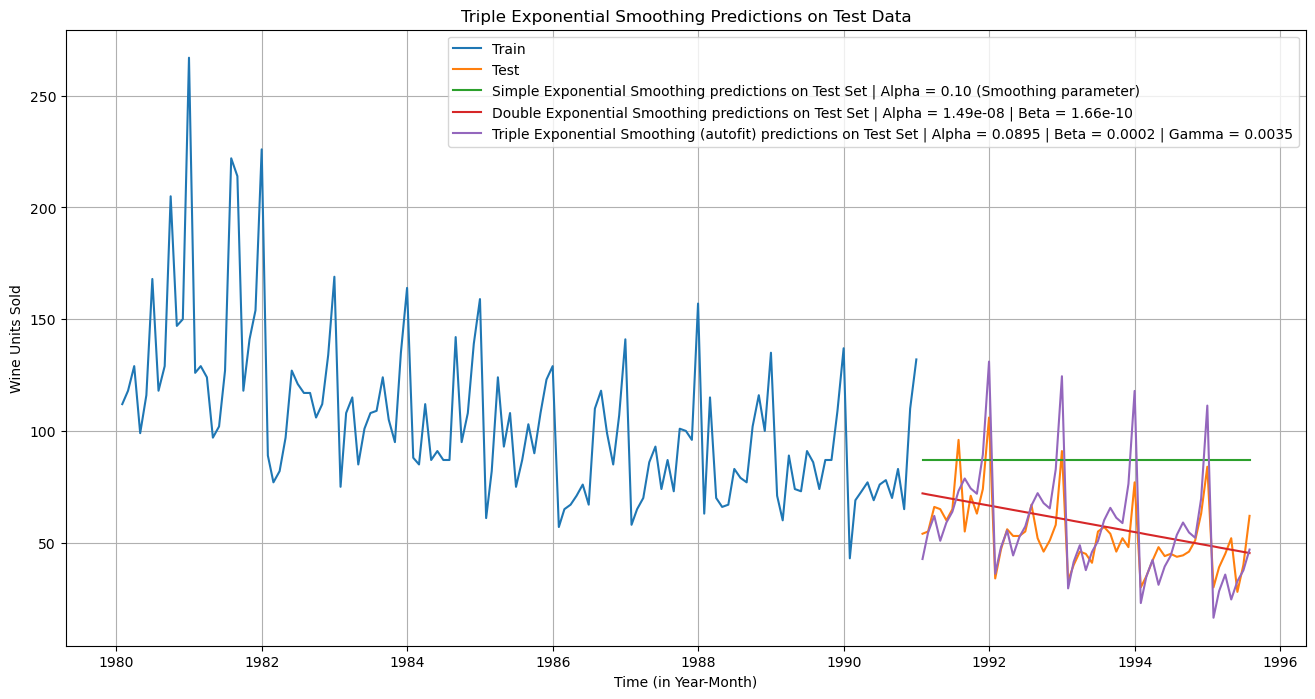

In [137]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(16,8))

plt.plot(tes_train['RoseWine_Sales'], label='Train')
plt.plot(tes_test['RoseWine_Sales'], label='Test')

plt.plot(ses_test['SES_pred',0.1], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.10 (Smoothing parameter)')
plt.plot(des_test['DES_pred'], label='Double Exponential Smoothing predictions on Test Set | Alpha = 1.49e-08 | Beta = 1.66e-10')
plt.plot(tes_test['TES_pred'], label='Triple Exponential Smoothing (autofit) predictions on Test Set | Alpha = 0.0895 | Beta = 0.0002 | Gamma = 0.0035')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 9b. Triple Exponential Smoothing (Autofit) - Model Evaluation

In [139]:
rmse_tes = metrics.root_mean_squared_error(test['RoseWine_Sales'],tes_test['TES_pred'])
print("For Triple Exponential Smoothing Model forecast (Alpha = 0.0895, Beta = 0.0002 & Gamma = 0.0035) on the Test Data,  RMSE is %3.3f" %(rmse_tes))

For Triple Exponential Smoothing Model forecast (Alpha = 0.0895, Beta = 0.0002 & Gamma = 0.0035) on the Test Data,  RMSE is 14.292


In [140]:
df_rmse_tes = pd.DataFrame({'Test RMSE': [rmse_tes]},index=['Triple Exponential Smoothing (autofit) | Alpha = 0.0895 | Beta = 0.0002 | Gamma = 0.0035'])

df_rmse = pd.concat([df_rmse, df_rmse_tes])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Double Exponential Smoothing (autofit) | Alpha ...  15.291448
Double Exponential Smoothing (manual) | Alpha =...  15.670743
Triple Exponential Smoothing (autofit) | Alpha ...  14.292378

### 10a. Triple Exponential Smoothing (Manual) - Model Building

In [142]:
df_rmse_tes_manual = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Test RMSE': []})
df_rmse_tes_manual

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Test RMSE]
Index: []

In [143]:
%%time
tes_model = ExponentialSmoothing(tes_train['RoseWine_Sales'],trend='additive',seasonal='multiplicative',initialization_method='estimated',freq='M')
for i in np.arange(0.1,1.05,0.05):
    for j in np.arange(0.1,1.05,0.05):
        for k in np.arange(0.1,1.05,0.05):      
            tes_manual = tes_model.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            tes_test['TES_pred',i,j,k] = tes_manual.forecast(len(test))
            rmse_tes_manual = metrics.root_mean_squared_error(des_test['RoseWine_Sales'], tes_test['TES_pred',i,j,k])
            df_tes_manual_temp = pd.DataFrame({'Alpha': i,'Beta': j,'Gamma': k,'Test RMSE': rmse_tes_manual},index=[k])
            df_rmse_tes_manual = pd.concat([df_rmse_tes_manual, df_tes_manual_temp])

df_rmse_tes_manual

CPU times: total: 3min 55s
Wall time: 5min 27s


Alpha  Beta  Gamma     Test RMSE
0.10    0.1   0.1   0.10     11.886500
0.15    0.1   0.1   0.15     11.719198
0.20    0.1   0.1   0.20     11.664889
0.25    0.1   0.1   0.25     11.692345
0.30    0.1   0.1   0.30     11.786598
...     ...   ...    ...           ...
0.80    1.0   1.0   0.80   2573.833789
0.85    1.0   1.0   0.85   5275.322081
0.90    1.0   1.0   0.90   3522.898226
0.95    1.0   1.0   0.95  19328.687109
1.00    1.0   1.0   1.00   3104.656732

[6859 rows x 4 columns]

In [144]:
print('Top 5 Alpha-Beta-Gamma Values with least RMSE:-\n')
df_rmse_tes_manual.sort_values(by=['Test RMSE']).head()

Top 5 Alpha-Beta-Gamma Values with least RMSE:-



Alpha  Beta  Gamma  Test RMSE
0.10    0.1  0.20   0.10   9.263811
0.10    0.1  0.15   0.10   9.313443
0.15    0.1  0.15   0.15   9.341160
0.15    0.1  0.20   0.15   9.373094
0.20    0.1  0.15   0.20   9.431296

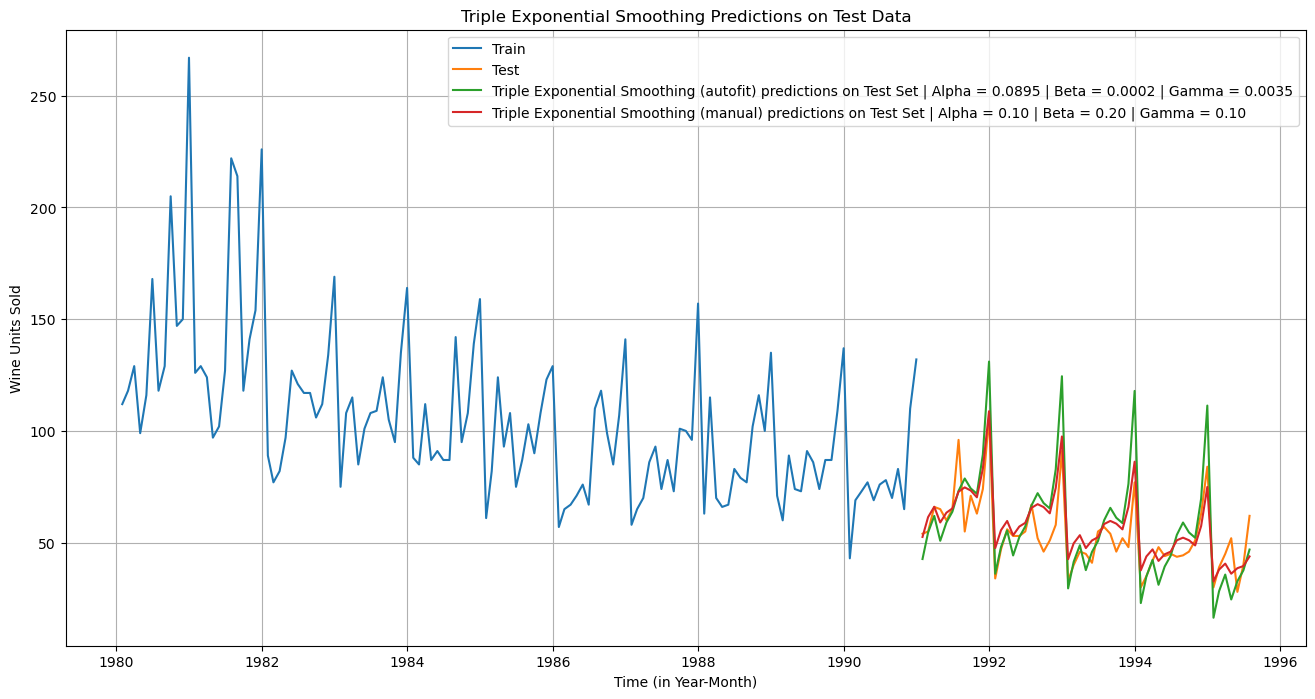

In [145]:
# Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

# Fitting the model again with Alpha = 0.1, Beta = 0.20 & Gamma = 0.10, since it has the least RMSE
tes_manual_i_j = tes_model.fit(smoothing_level=0.1,smoothing_trend=0.20,smoothing_seasonal=0.10,optimized=False,use_brute=True)
tes_test['TES_pred',0.10,0.20,0.10] = tes_manual_i_j.forecast(steps=len(test))

plt.figure(figsize=(16,8))

plt.plot(tes_train['RoseWine_Sales'], label='Train')
plt.plot(tes_test['RoseWine_Sales'], label='Test')

plt.plot(tes_test['TES_pred'], label='Triple Exponential Smoothing (autofit) predictions on Test Set | Alpha = 0.0895 | Beta = 0.0002 | Gamma = 0.0035')
plt.plot(tes_test['TES_pred',0.10,0.20,0.10], label='Triple Exponential Smoothing (manual) predictions on Test Set | Alpha = 0.10 | Beta = 0.20 | Gamma = 0.10')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 10b. Triple Exponential Smoothing (Manual) - Model Evaluation

In [147]:
rmse_tes_manual = metrics.root_mean_squared_error(test['RoseWine_Sales'],tes_test['TES_pred',0.10,0.20,0.10])
print("For Triple Exponential Smoothing Model forecast (Alpha = 0.10, Beta = 0.20 & Gamma = 0.10) on the Test Data,  RMSE is %3.3f" %(rmse_tes_manual))

For Triple Exponential Smoothing Model forecast (Alpha = 0.10, Beta = 0.20 & Gamma = 0.10) on the Test Data,  RMSE is 9.264


In [148]:
df_rmse_tes_manual = pd.DataFrame({'Test RMSE': [rmse_tes_manual]},index=['Triple Exponential Smoothing (manual) | Alpha = 0.10 | Beta = 0.20 | Gamma = 0.10'])

df_rmse = pd.concat([df_rmse, df_rmse_tes_manual])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Double Exponential Smoothing (autofit) | Alpha ...  15.291448
Double Exponential Smoothing (manual) | Alpha =...  15.670743
Triple Exponential Smoothing (autofit) | Alpha ...  14.292378
Triple Exponential Smoothing (manual) | Alpha =...   9.263811

# Check for Stationarity

In [150]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

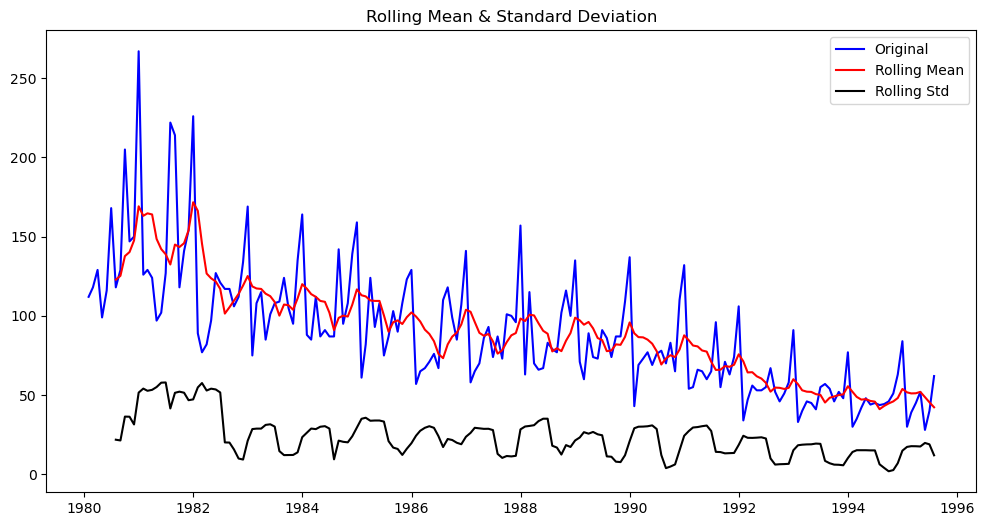

Results of Dickey-Fuller Test:
Test Statistic                  -1.873273
p-value                          0.344737
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [151]:
# Test stationarity on complete dataset
test_stationarity(df['RoseWine_Sales'])

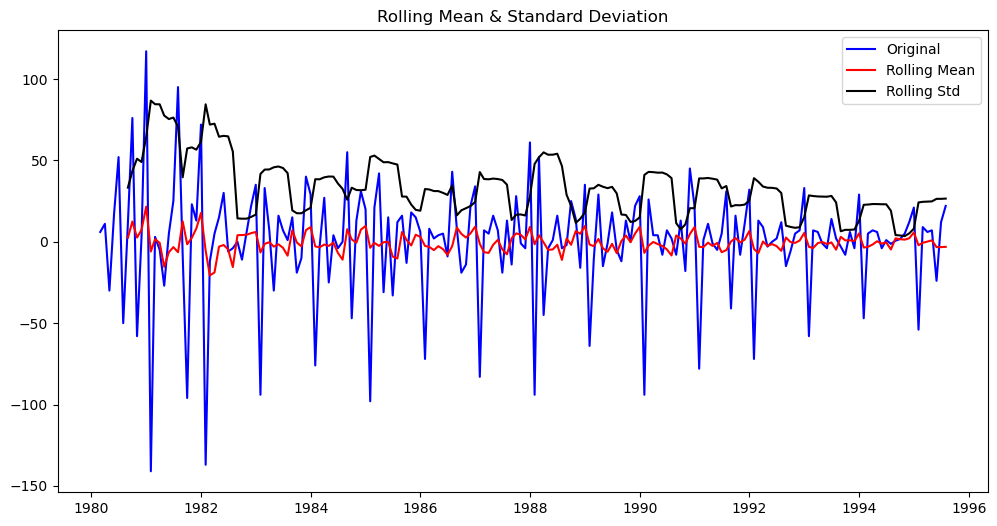

Results of Dickey-Fuller Test:
Test Statistic                -8.043385e+00
p-value                        1.821604e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [152]:
# Take a difference of order 1 and check whether the Time Series is stationary for complete dataset i.e. p-value < Alpha (5%)

test_stationarity(df['RoseWine_Sales'].diff().dropna())

# Now it is stationary

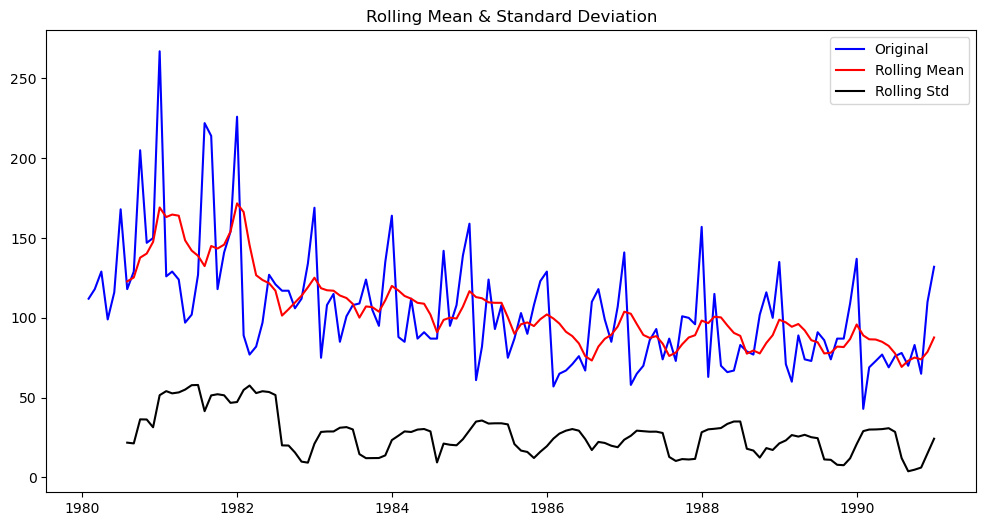

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [153]:
# Test stationarity on Train dataset
test_stationarity(train['RoseWine_Sales'])

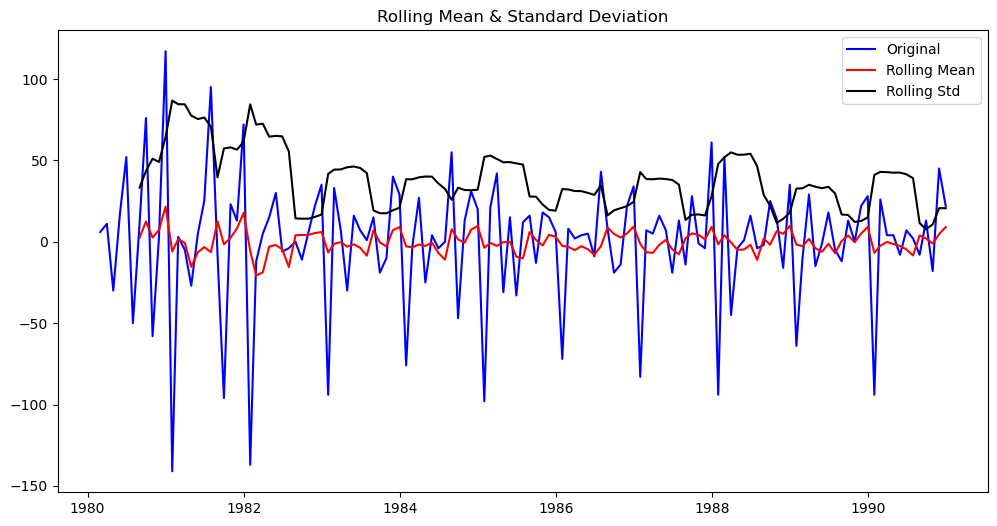

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [154]:
# Take a difference of order 1 and check whether the Time Series is stationary for Train dataset i.e. p-value < Alpha (5%)

test_stationarity(train['RoseWine_Sales'].diff().dropna())

# Now it is stationary

# Model Building - Stationary Data

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

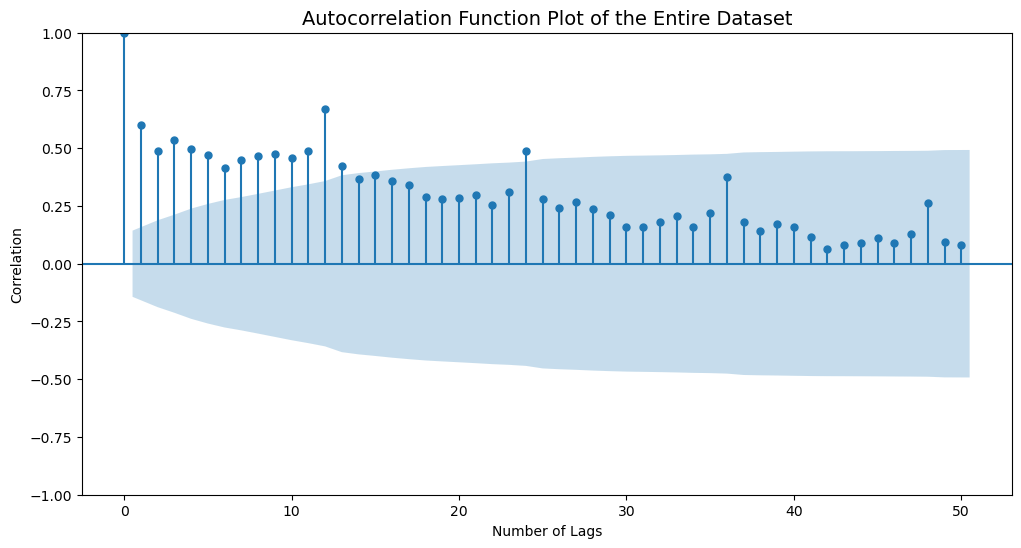

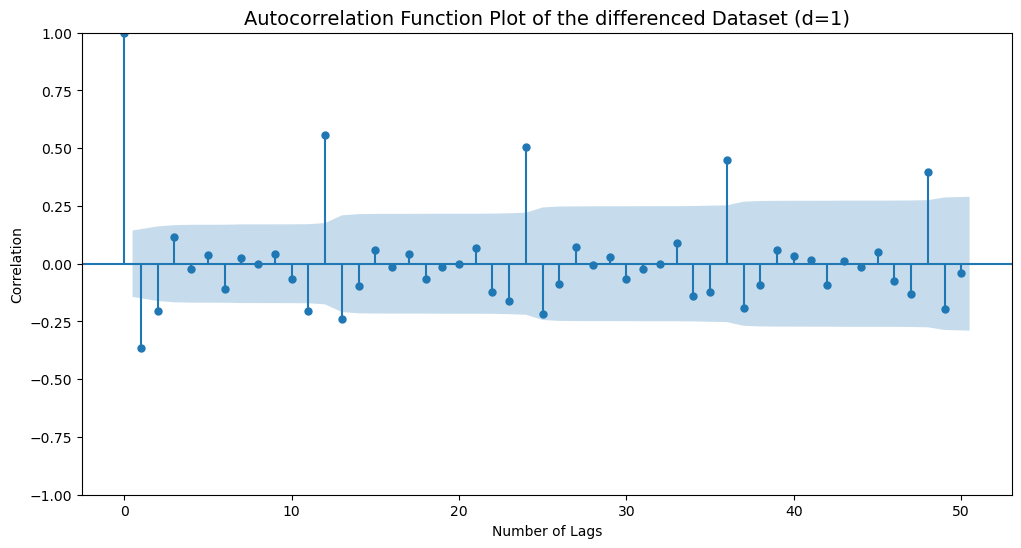

In [157]:
plot_acf(df,alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show();

plot_acf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show();

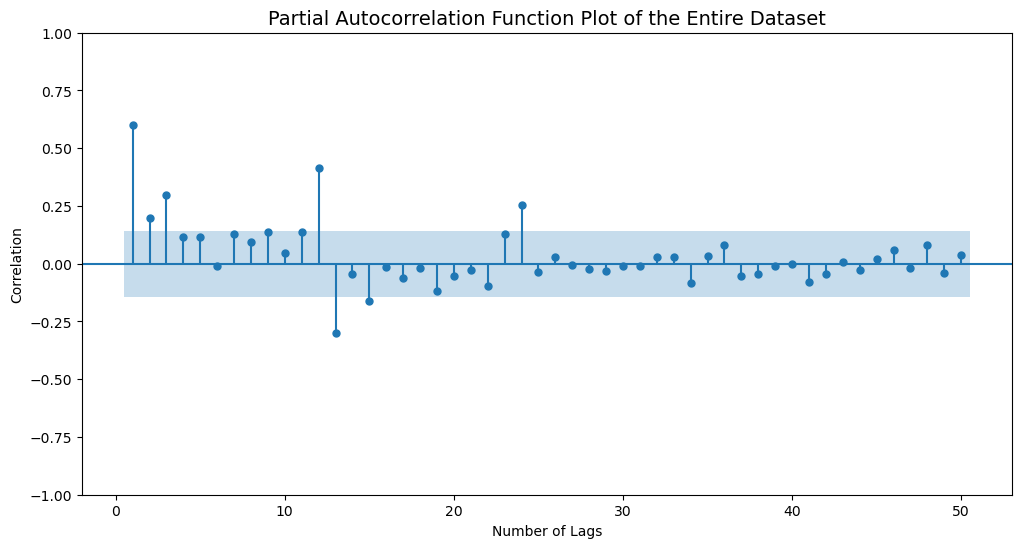

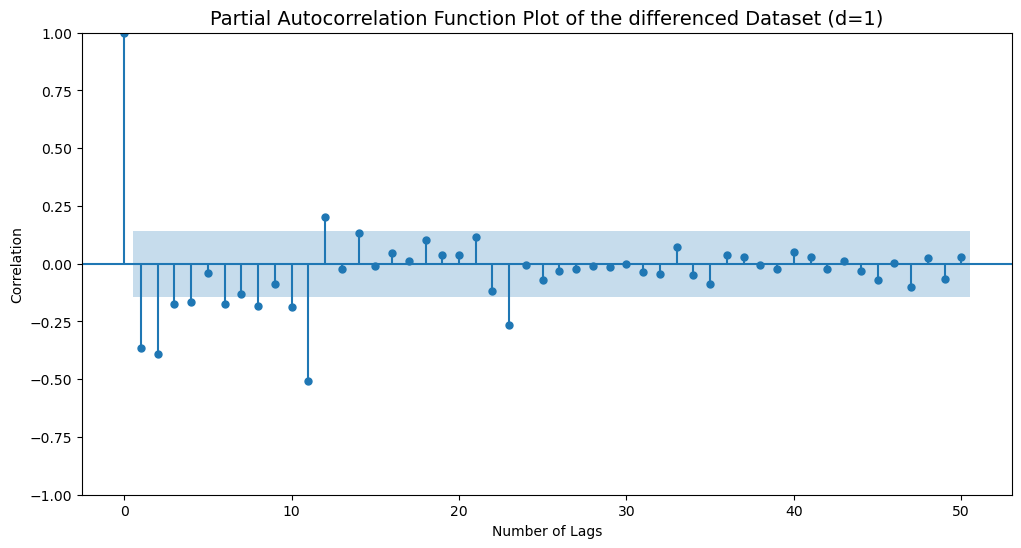

In [158]:
plot_pacf(df,zero=False,alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show();

plot_pacf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show();

### 1a. Auto ARIMA - Model Building

In [160]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [161]:
# Creating an empty Dataframe with column names only
df_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
df_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [162]:
from statsmodels.tsa.arima.model import ARIMA

i = 0
for param in pdq:   # running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['RoseWine_Sales'].values,order=param).fit()
    #print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    df_ARIMA_AIC_temp = pd.DataFrame({'param': [param],'AIC': [ARIMA_model.aic]}, index=[i])
    df_ARIMA_AIC = pd.concat([df_ARIMA_AIC, df_ARIMA_AIC_temp])
    i = i+1

df_ARIMA_AIC

param          AIC
0   (0, 1, 0)  1333.154673
1   (0, 1, 1)  1282.309832
2   (0, 1, 2)  1279.671529
3   (0, 1, 3)  1280.545376
4   (0, 1, 4)  1281.676698
5   (1, 1, 0)  1317.350311
6   (1, 1, 1)  1280.574230
7   (1, 1, 2)  1279.870723
8   (1, 1, 3)  1281.870722
9   (1, 1, 4)  1279.605264
10  (2, 1, 0)  1298.611034
11  (2, 1, 1)  1281.507862
12  (2, 1, 2)  1281.870722
13  (2, 1, 3)  1274.695440
14  (2, 1, 4)  1278.768576
15  (3, 1, 0)  1297.481092
16  (3, 1, 1)  1282.419278
17  (3, 1, 2)  1283.720741
18  (3, 1, 3)  1278.657996
19  (3, 1, 4)  1287.719077
20  (4, 1, 0)  1296.326657
21  (4, 1, 1)  1283.793172
22  (4, 1, 2)  1285.718249
23  (4, 1, 3)  1278.451412
24  (4, 1, 4)  1282.370643

In [163]:
# Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

df_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
13  (2, 1, 3)  1274.695440
23  (4, 1, 3)  1278.451412
18  (3, 1, 3)  1278.657996
14  (2, 1, 4)  1278.768576
9   (1, 1, 4)  1279.605264

In [164]:
# Build ARIMA model with parameters (2,1,3) with the least AIC as shown above
ARIMA_auto = ARIMA(train, order=(2,1,3))
ARIMA_auto_model = ARIMA_auto.fit()

print(ARIMA_auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:         RoseWine_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Wed, 09 Apr 2025   AIC                           1274.695
Time:                        19:15:37   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7291      0.084     -8.706      0.000      -0.893      -0.565
ma.L1          1.0444      0.618      1.691      0.0

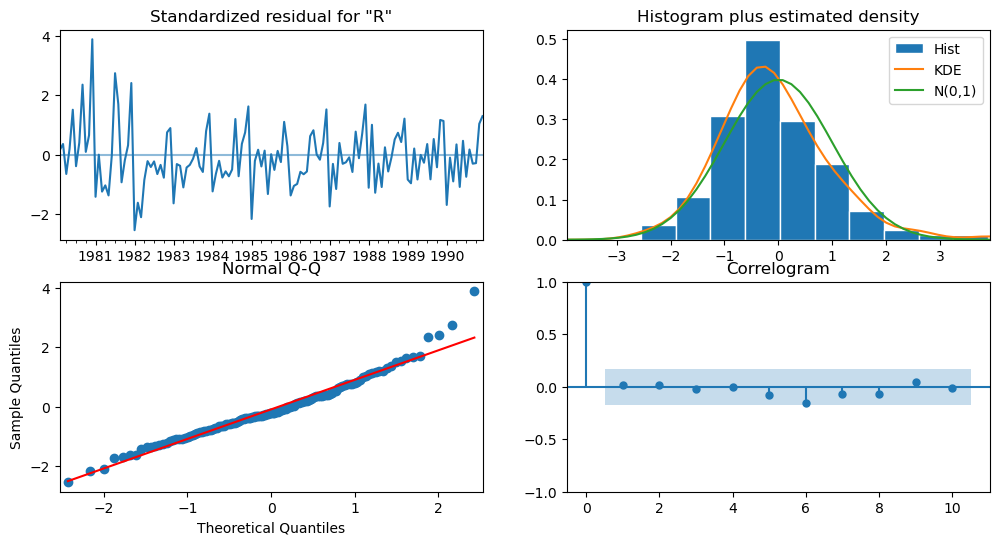

In [165]:
# Diagnostics Plot

ARIMA_auto_model.plot_diagnostics();

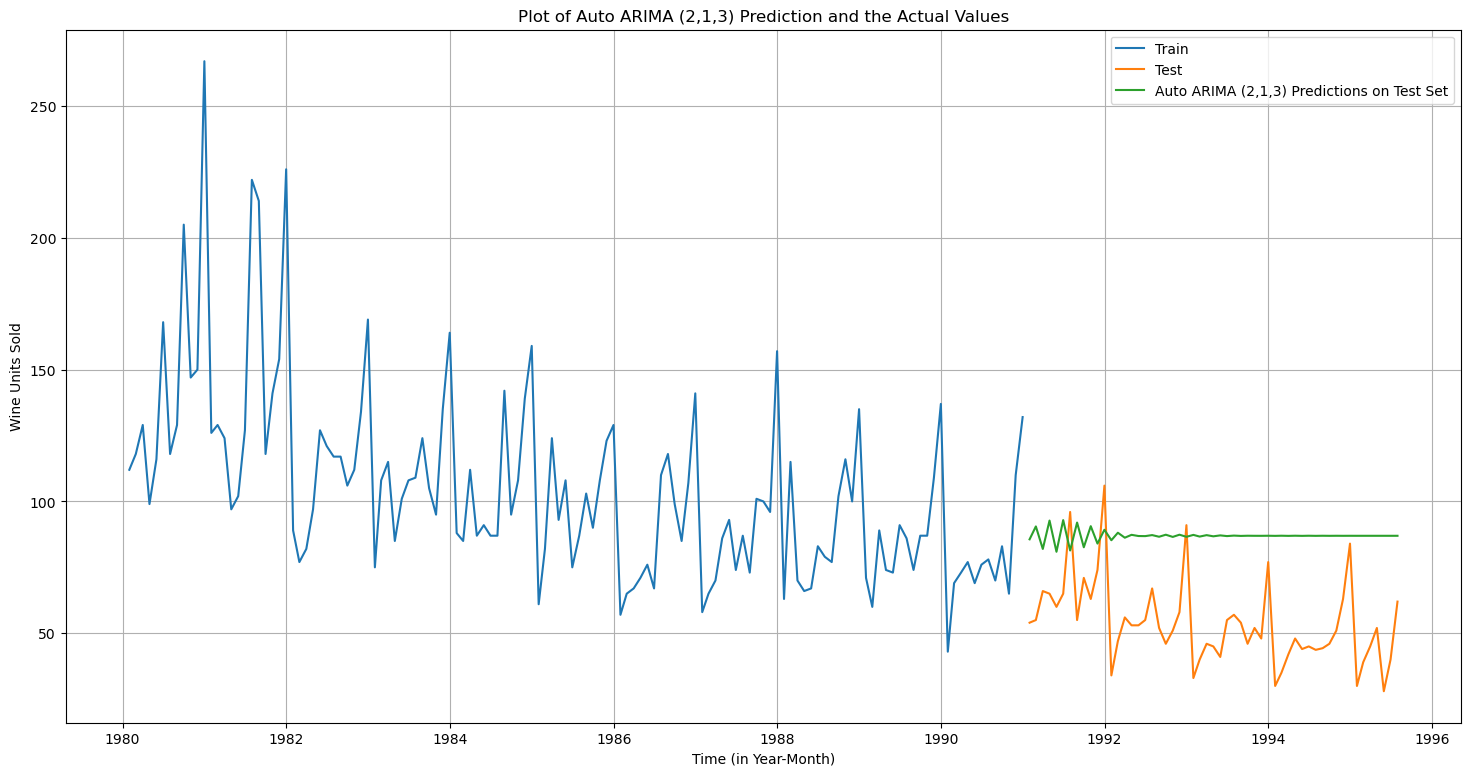

In [166]:
## Plotting on both the Training and Test using autofit

ARIMA_auto_train = train.copy()
ARIMA_auto_test = test.copy()

ARIMA_auto_test['ARIMA_auto_pred'] = ARIMA_auto_model.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(train['RoseWine_Sales'], label='Train')
plt.plot(test['RoseWine_Sales'], label='Test')

plt.plot(ARIMA_auto_test['ARIMA_auto_pred'], label='Auto ARIMA (2,1,3) Predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto ARIMA (2,1,3) Prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 1b. Auto ARIMA - Model Evaluation

In [168]:
rmse_ARIMA_auto = metrics.root_mean_squared_error(test['RoseWine_Sales'],ARIMA_auto_test['ARIMA_auto_pred'])
print("For Auto ARIMA (2,1,3) on the Test Data,  RMSE is %3.3f" %(rmse_ARIMA_auto))

For Auto ARIMA (2,1,3) on the Test Data,  RMSE is 36.875


In [169]:
df_rmse_ARIMA_auto = pd.DataFrame({'Test RMSE': [rmse_ARIMA_auto]},index=['Auto ARIMA (2,1,3)'])

df_rmse = pd.concat([df_rmse, df_rmse_ARIMA_auto])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Double Exponential Smoothing (autofit) | Alpha ...  15.291448
Double Exponential Smoothing (manual) | Alpha =...  15.670743
Triple Exponential Smoothing (autofit) | Alpha ...  14.292378
Triple Exponential Smoothing (manual) | Alpha =...   9.263811
Auto ARIMA (2,1,3)                                  36.874717

### 2a. Manual ARIMA - Model Building

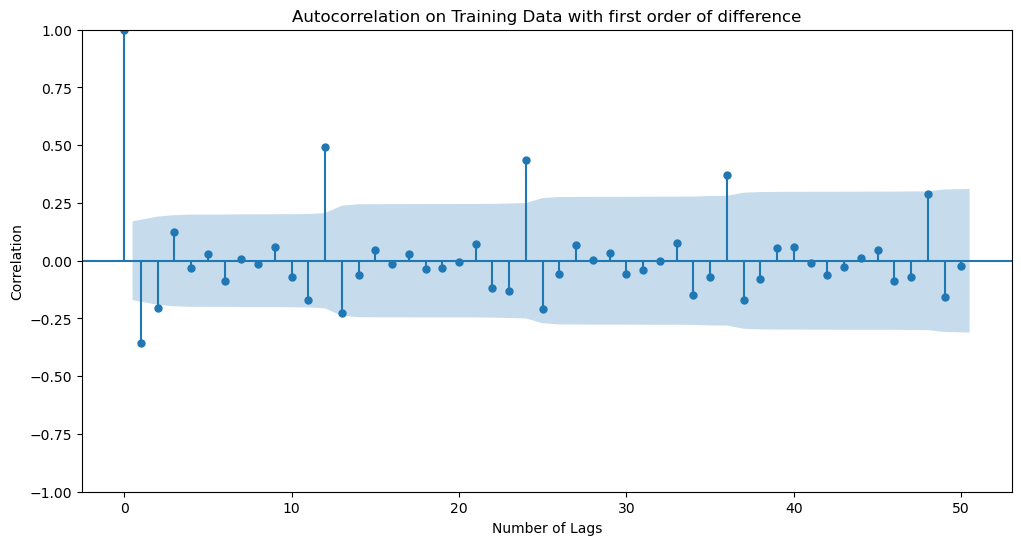

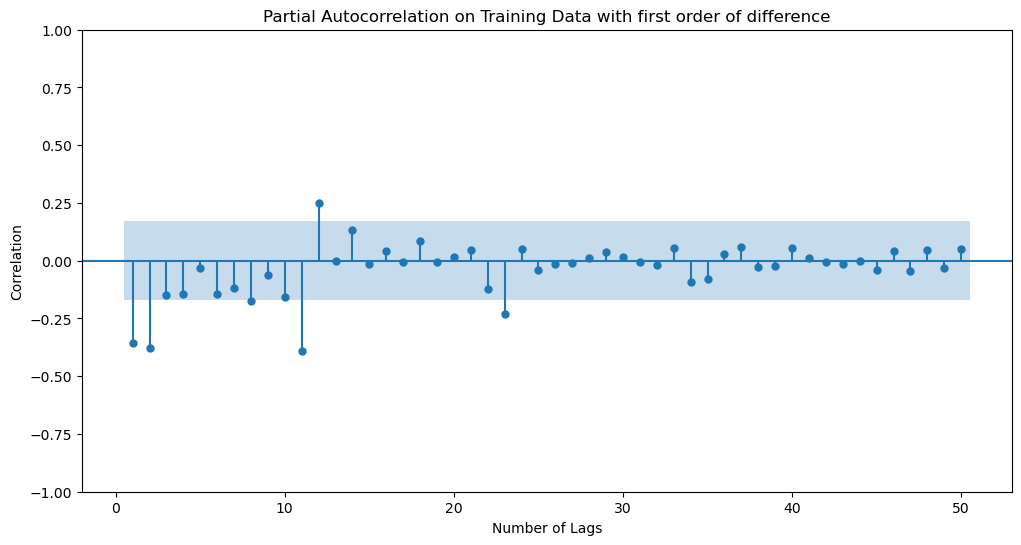

In [171]:
#Plot ACF & PACF again on Train dataset with d=1
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

In [172]:
# ACF shows significant lags up to ~3, suggesting an MA(2) or MA(3)
# PACF has strong spikes at lags 1 and 2, implying an AR(2) component
# By Manual inspection, suggested parameters are (2,1,2) or (2,1,3)
# Since, we have already built a model with (2,1,3), we shall go ahead & now build for (2,1,2)

ARIMA_manual = ARIMA(train, order=(2,1,2))
ARIMA_manual_model = ARIMA_manual.fit()

print(ARIMA_manual_model.summary())

                               SARIMAX Results                                
Dep. Variable:         RoseWine_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Wed, 09 Apr 2025   AIC                           1281.871
Time:                        19:15:42   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

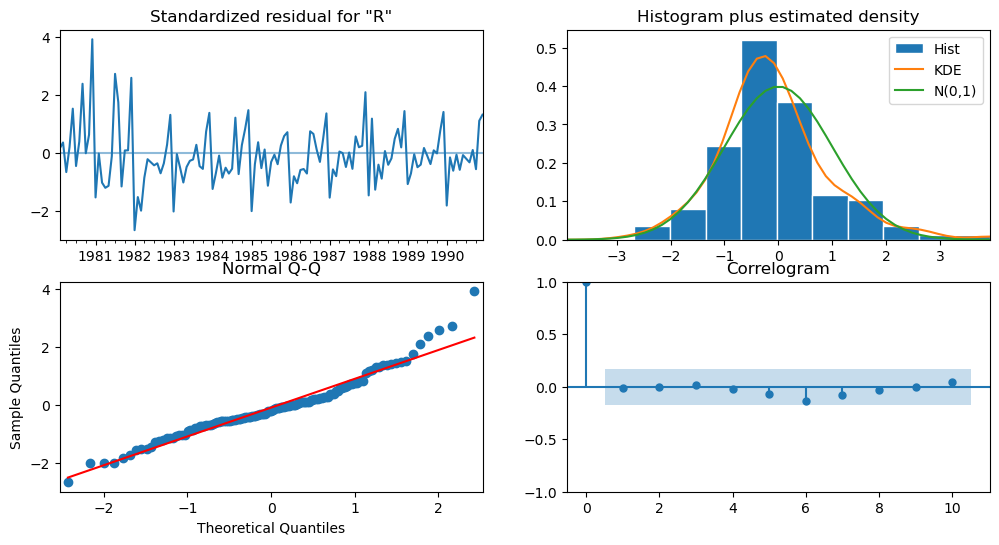

In [173]:
# Diagnostics Plot

ARIMA_manual_model.plot_diagnostics();

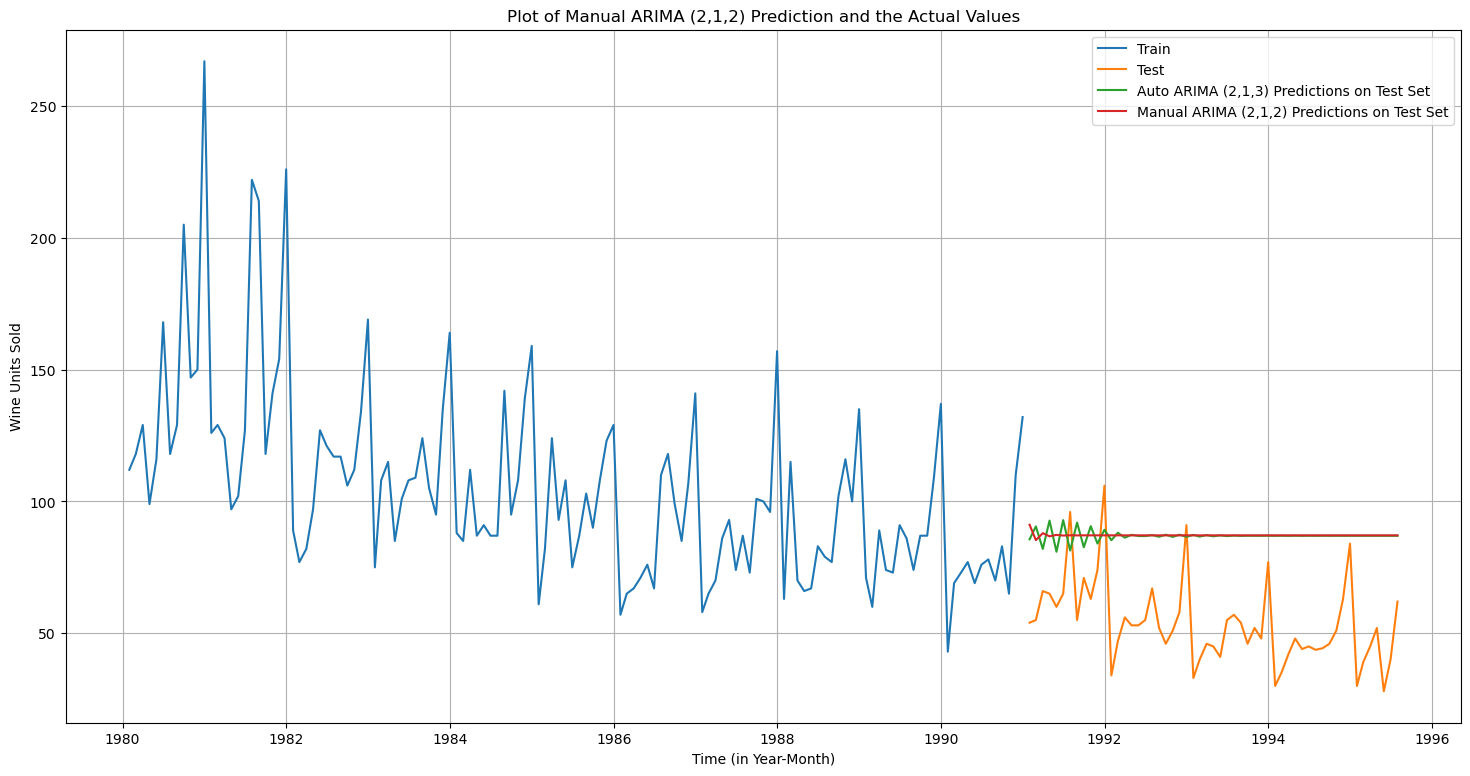

In [174]:
## Plotting on both the Training and Test using autofit

ARIMA_manual_train = train.copy()
ARIMA_manual_test = test.copy()

ARIMA_manual_test['ARIMA_manual_pred'] = ARIMA_manual_model.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(train['RoseWine_Sales'], label='Train')
plt.plot(test['RoseWine_Sales'], label='Test')

plt.plot(ARIMA_auto_test['ARIMA_auto_pred'], label='Auto ARIMA (2,1,3) Predictions on Test Set')
plt.plot(ARIMA_manual_test['ARIMA_manual_pred'], label='Manual ARIMA (2,1,2) Predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,2) Prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 2b. Manual ARIMA - Model Evaluation

In [176]:
rmse_ARIMA_manual = metrics.root_mean_squared_error(test['RoseWine_Sales'],ARIMA_manual_test['ARIMA_manual_pred'])
print("For Manual ARIMA (2,1,2) on the Test Data,  RMSE is %3.3f" %(rmse_ARIMA_manual))

For Manual ARIMA (2,1,2) on the Test Data,  RMSE is 36.933


In [177]:
df_rmse_ARIMA_manual = pd.DataFrame({'Test RMSE': [rmse_ARIMA_manual]},index=['Manual ARIMA (2,1,2)'])

df_rmse = pd.concat([df_rmse, df_rmse_ARIMA_manual])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Double Exponential Smoothing (autofit) | Alpha ...  15.291448
Double Exponential Smoothing (manual) | Alpha =...  15.670743
Triple Exponential Smoothing (autofit) | Alpha ...  14.292378
Triple Exponential Smoothing (manual) | Alpha =...   9.263811
Auto ARIMA (2,1,3)                                  36.874717
Manual ARIMA (2,1,2)                                36.933459

### 3a. Auto SARIMA - Model Building

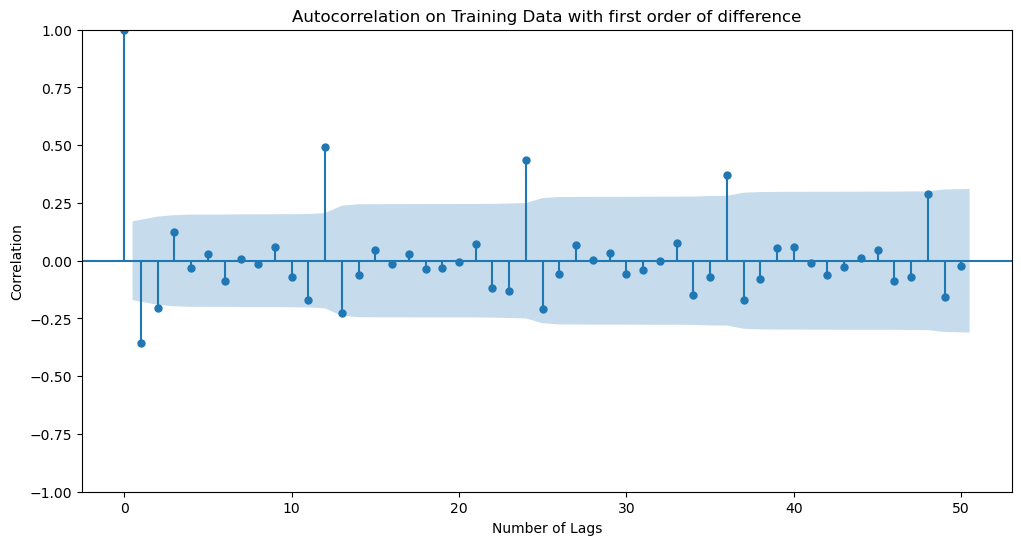

In [179]:
#Plot ACF again on Train dataset with d=1 to check seasonality
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

In [180]:
# We showed earlier that d = 1 makes the series stationary. Hence, D = 0 (as series is already stationary at d = 1)
# Clearly S = 12 as we see a pattern (spike) repeating after 12 months

# Below are the various combinations of SARIMA paramter combinations

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [181]:
df_SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
df_SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [182]:
%%time
import statsmodels.api as sm

i = 0
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_auto = sm.tsa.statespace.SARIMAX(train['RoseWine_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)        
        results_SARIMA = SARIMA_auto.fit(maxiter=1000)
        df_SARIMA_AIC_temp = pd.DataFrame({'param': [param],'seasonal': [param_seasonal],'AIC': [results_SARIMA.aic]}, index=[i])
        df_SARIMA_AIC = pd.concat([df_SARIMA_AIC, df_SARIMA_AIC_temp])
        i = i+1

df_SARIMA_AIC

CPU times: total: 24min 35s
Wall time: 23min 50s


param       seasonal          AIC
0    (0, 1, 0)  (0, 0, 0, 12)  1323.965788
1    (0, 1, 0)  (0, 0, 1, 12)  1145.423083
2    (0, 1, 0)  (0, 0, 2, 12)   976.437530
3    (0, 1, 0)  (0, 0, 3, 12)  3808.101413
4    (0, 1, 0)  (1, 0, 0, 12)  1139.921739
..         ...            ...          ...
251  (3, 1, 3)  (2, 0, 3, 12)  3739.314192
252  (3, 1, 3)  (3, 0, 0, 12)   775.561018
253  (3, 1, 3)  (3, 0, 1, 12)   776.369039
254  (3, 1, 3)  (3, 0, 2, 12)   778.231617
255  (3, 1, 3)  (3, 0, 3, 12)  3222.696809

[256 rows x 3 columns]

In [183]:
df_SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400286
238  (3, 1, 2)  (3, 0, 2, 12)  774.880935
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [184]:
#Building Model with least AIC Parameters

SARIMA_auto_final = sm.tsa.statespace.SARIMAX(train['RoseWine_Sales'],
                                order=(3,1,1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_auto = SARIMA_auto_final.fit(maxiter=1000)
print(results_SARIMA_auto.summary())

                                        SARIMAX Results                                        
Dep. Variable:                          RoseWine_Sales   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Wed, 09 Apr 2025   AIC                            774.400
Time:                                         19:39:41   BIC                            799.618
Sample:                                     01-31-1980   HQIC                           784.578
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

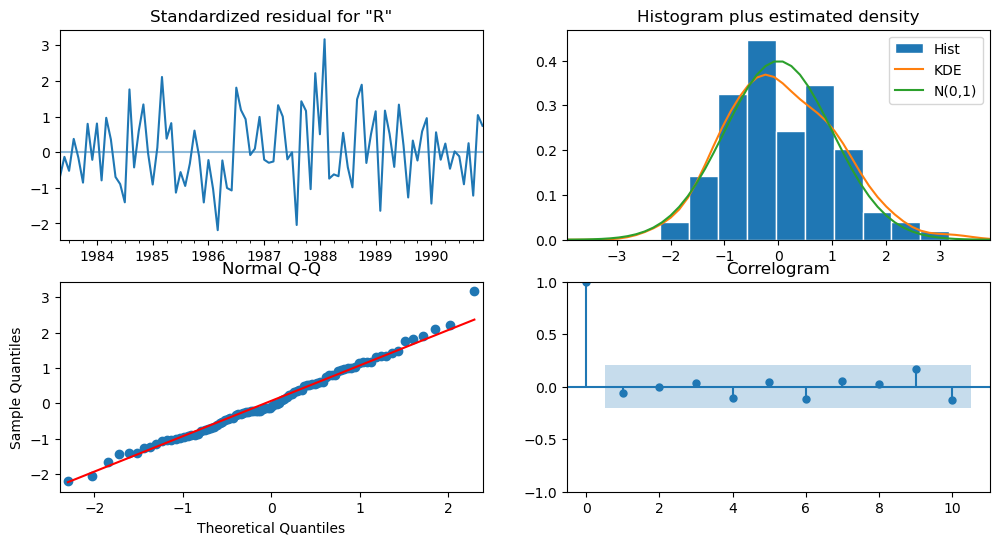

In [185]:
results_SARIMA_auto.plot_diagnostics();

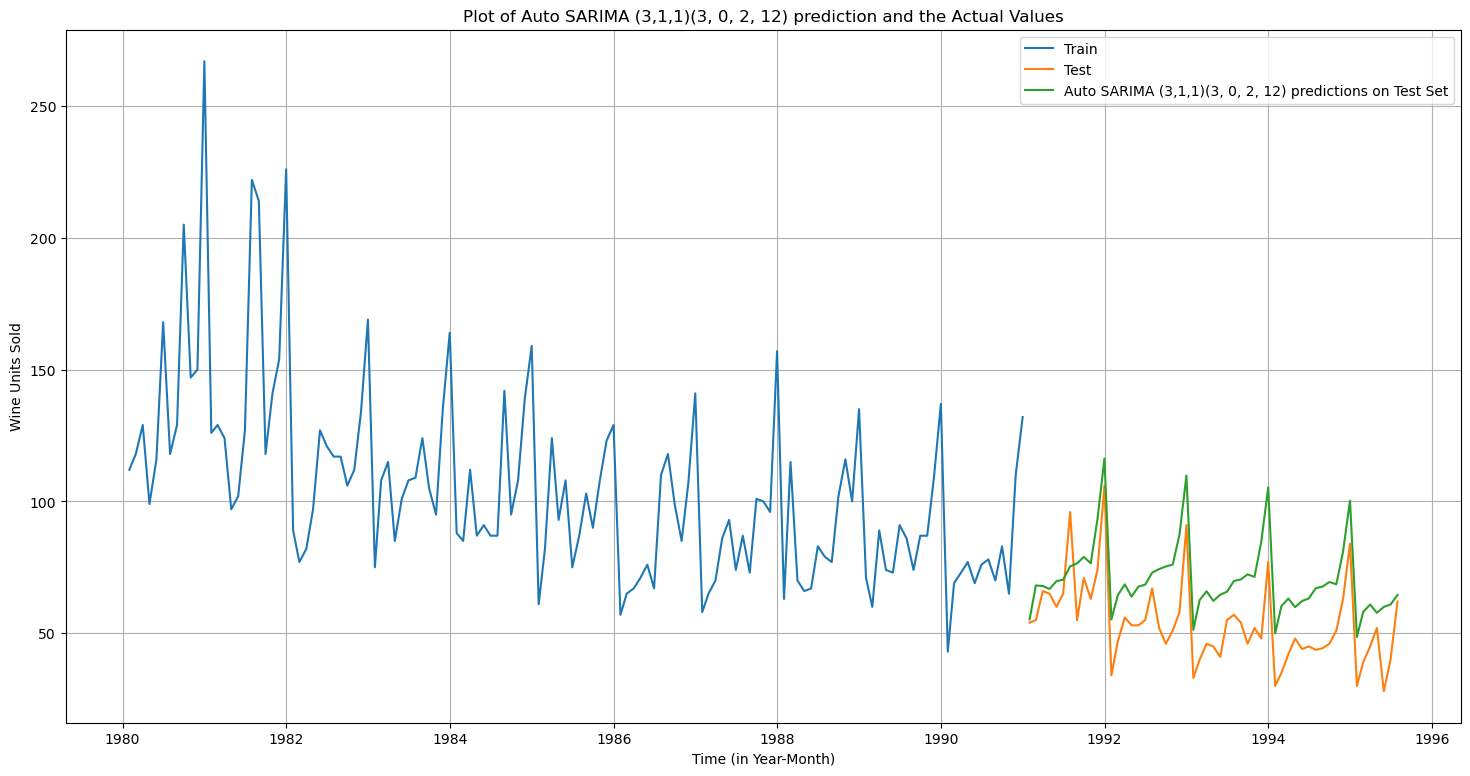

In [186]:
## Plotting on both the Training and Test using autofit

SARIMA_auto_train = train.copy()
SARIMA_auto_test = test.copy()

SARIMA_auto_test['SARIMA_auto_pred'] = results_SARIMA_auto.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(train['RoseWine_Sales'], label='Train')
plt.plot(test['RoseWine_Sales'], label='Test')

plt.plot(SARIMA_auto_test['SARIMA_auto_pred'], label='Auto SARIMA (3,1,1)(3, 0, 2, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (3,1,1)(3, 0, 2, 12) prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 3b. Auto SARIMA - Model Evaluation

In [188]:
rmse_SARIMA_auto = metrics.root_mean_squared_error(test['RoseWine_Sales'],SARIMA_auto_test['SARIMA_auto_pred'])
print("For Auto SARIMA (3,1,1)(3, 0, 2, 12) forecast on the Test Data,  RMSE is %3.3f" %(rmse_SARIMA_auto))

For Auto SARIMA (3,1,1)(3, 0, 2, 12) forecast on the Test Data,  RMSE is 18.947


In [189]:
df_rmse_SARIMA_auto = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto]},index=['Auto SARIMA (3,1,1)(3, 0, 2, 12)'])

df_rmse = pd.concat([df_rmse, df_rmse_SARIMA_auto])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Double Exponential Smoothing (autofit) | Alpha ...  15.291448
Double Exponential Smoothing (manual) | Alpha =...  15.670743
Triple Exponential Smoothing (autofit) | Alpha ...  14.292378
Triple Exponential Smoothing (manual) | Alpha =...   9.263811
Auto ARIMA (2,1,3)                                  36.874717
Manual ARIMA (2,1,2)                                36.933459
Auto SARIMA (3,1,1)(3, 0, 2, 12)                    18.946850

### 4a. Manual SARIMA - Model Building

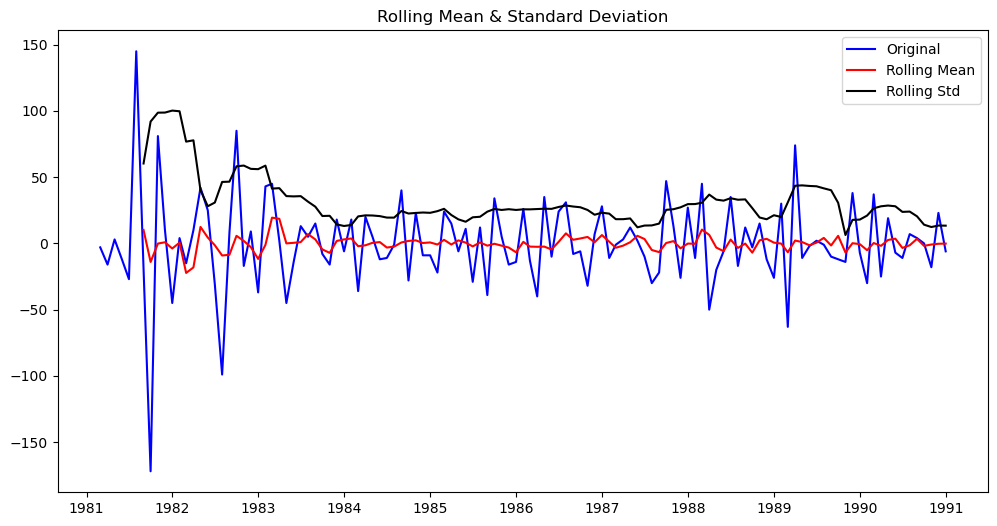

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [191]:
# We know at d=1, the train data set is stationary
# By looking at first order differenced ACF & PACF, there seems to be seasonality at an interval of 12. So, lets choose S = 12
# Lets test for stationarity with d=1, D=1, S=12 on the dataset (Time series with seasonal differencing followed by normal differencing)

test_stationarity((train['RoseWine_Sales'].diff(12).dropna()).diff().dropna())

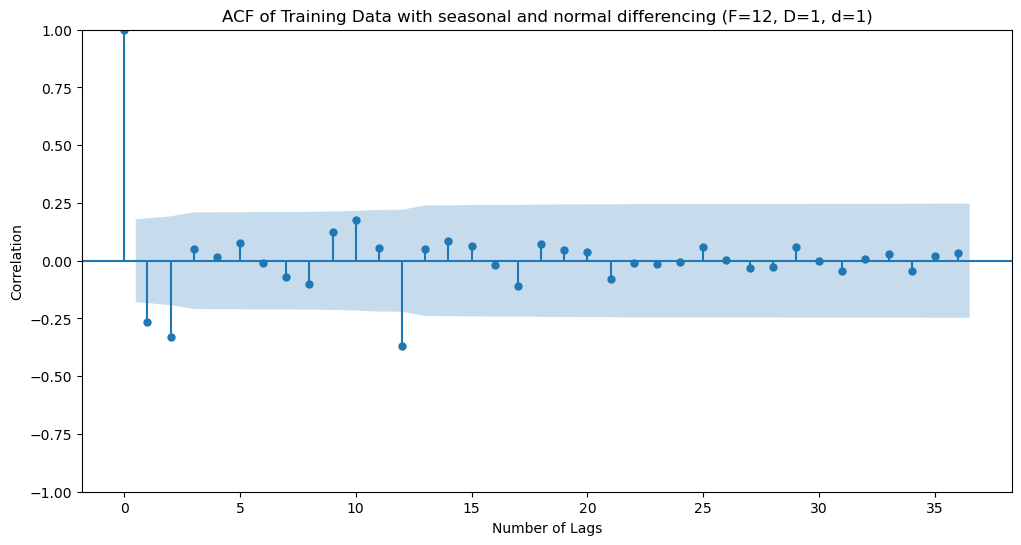

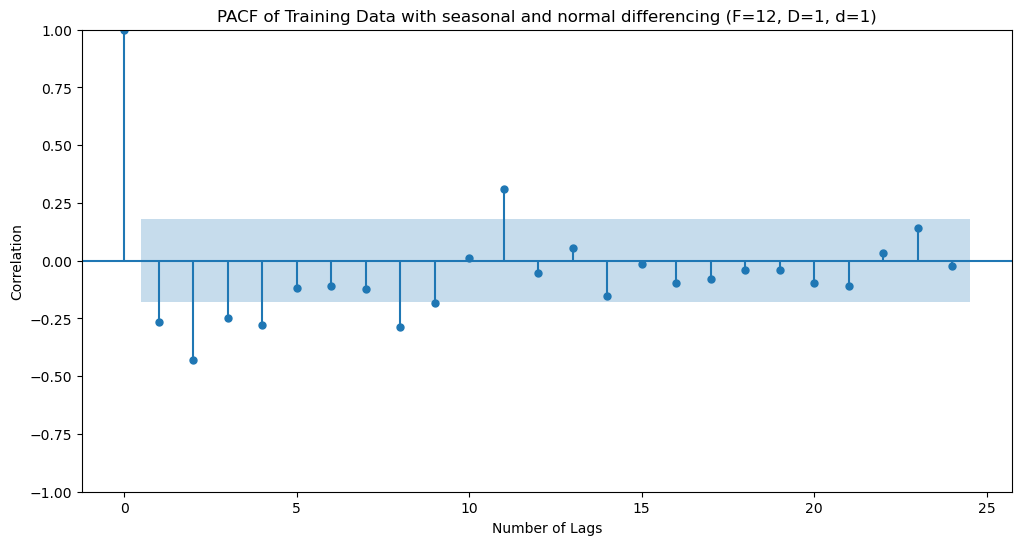

In [192]:
# Plot ACF and the PACF once more with seasonal and normal differencing on train data

plot_acf((train['RoseWine_Sales'].diff(12).dropna()).diff().dropna(),title='ACF of Training Data with seasonal and normal differencing (F=12, D=1, d=1)',lags=36)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

plot_pacf((train['RoseWine_Sales'].diff(12).dropna()).diff().dropna(),title='PACF of Training Data with seasonal and normal differencing (F=12, D=1, d=1)',lags=24)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

In [193]:
# We have taken alpha = 0.05 and seasonal period as 12 (S=12)
# PACF: Till lag 4 is significant before cut-off, so AR i.e. p = 4. 
# PACF: At seasonal lag of 12, it cuts off, so Seasonal AR i.e. P = 0
# ACF: Till lag 1 and 2 are significant before it cuts off, so MA i.e. q = 2. 
# ACF: At seasonal lag of 12, a significant lag is can be seen and no significant seaonal lags after 24, so Seasonal AR i.e. Q = 1
# The final selected terms for SARIMA model is (4, 1, 2)x(0, 1, 1, 12), as inferred from the ACF and PACF plots.

import statsmodels.api as sm

SARIMA_manual = sm.tsa.statespace.SARIMAX(train['RoseWine_Sales'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_manual = SARIMA_manual.fit(maxiter=1000)
print(results_SARIMA_manual.summary())

                                      SARIMAX Results                                       
Dep. Variable:                       RoseWine_Sales   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -446.102
Date:                              Wed, 09 Apr 2025   AIC                            908.203
Time:                                      19:39:48   BIC                            929.358
Sample:                                  01-31-1980   HQIC                           916.774
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8046      0.119     -6.778      0.000      -1.037      -0.572
ar.L2          0.03

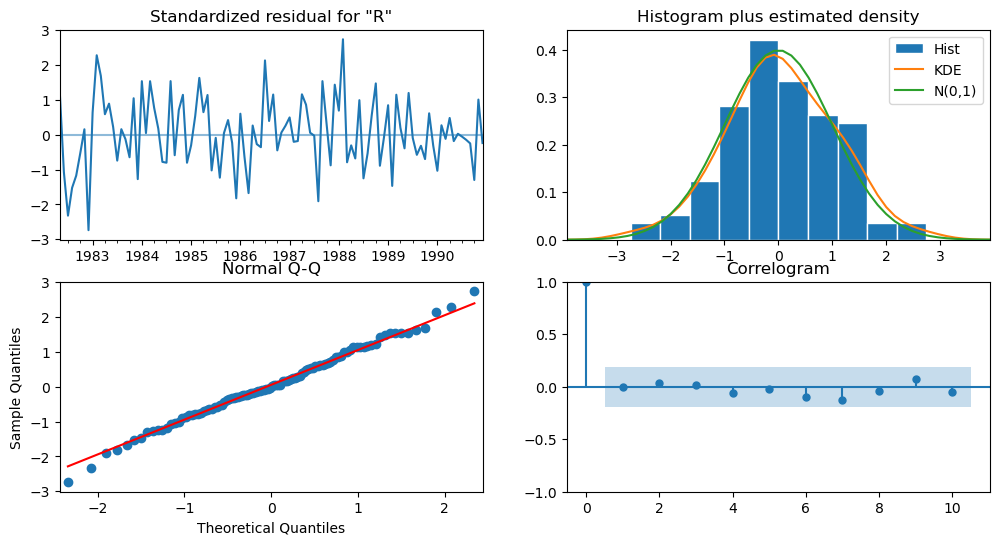

In [194]:
results_SARIMA_manual.plot_diagnostics();

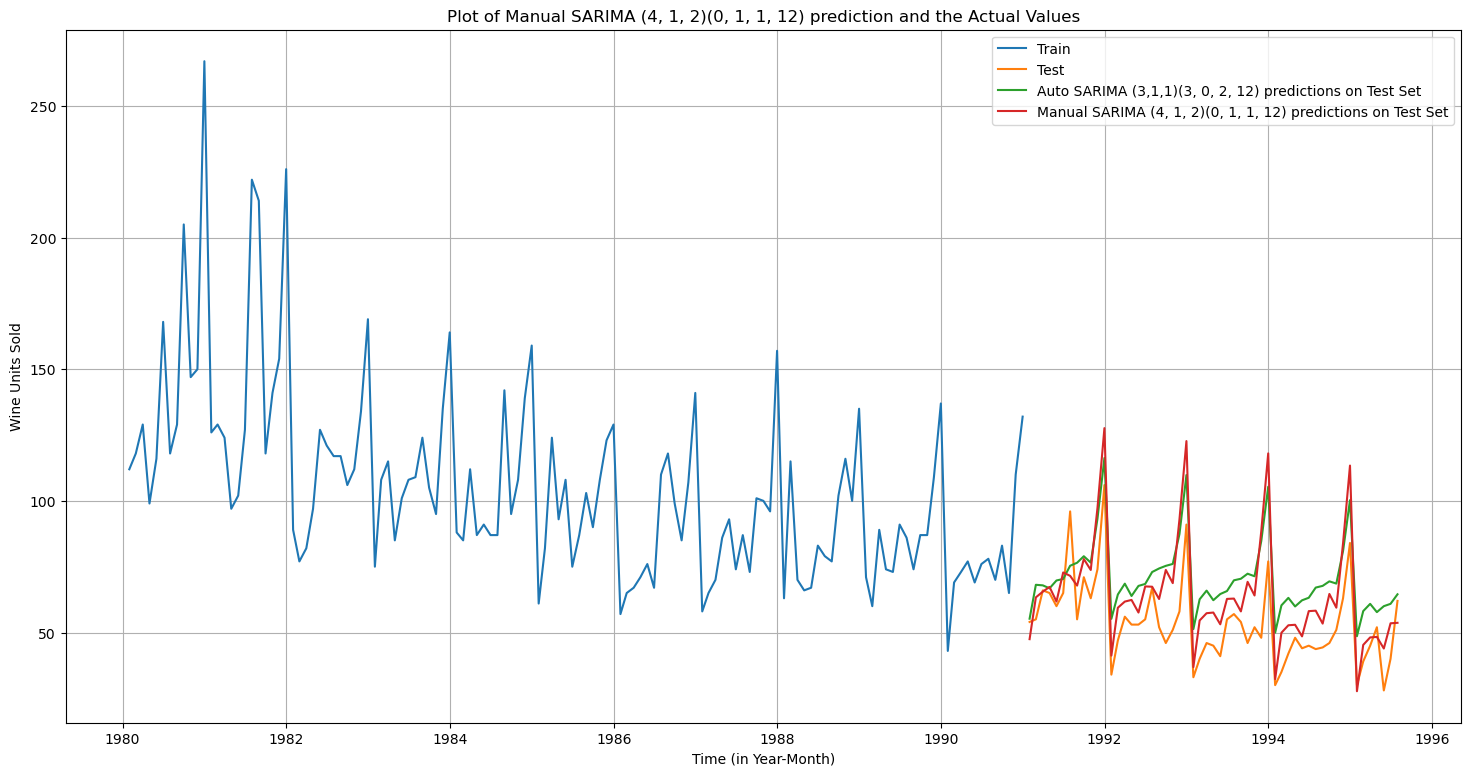

In [195]:
## Plotting on both the Training and Test using autofit

SARIMA_manual_train = train.copy()
SARIMA_manual_test = test.copy()

SARIMA_manual_test['SARIMA_manual_pred'] = results_SARIMA_manual.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(train['RoseWine_Sales'], label='Train')
plt.plot(test['RoseWine_Sales'], label='Test')

plt.plot(SARIMA_auto_test['SARIMA_auto_pred'], label='Auto SARIMA (3,1,1)(3, 0, 2, 12) predictions on Test Set')
plt.plot(SARIMA_manual_test['SARIMA_manual_pred'], label='Manual SARIMA (4, 1, 2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (4, 1, 2)(0, 1, 1, 12) prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 4b. Manual SARIMA - Model Evaluation

In [197]:
rmse_SARIMA_manual = metrics.root_mean_squared_error(test['RoseWine_Sales'],SARIMA_manual_test['SARIMA_manual_pred'])
print("For Manual SARIMA (4, 1, 2)(0, 1, 1, 12) forecast on the Test Data,  RMSE is %3.3f" %(rmse_SARIMA_manual))

For Manual SARIMA (4, 1, 2)(0, 1, 1, 12) forecast on the Test Data,  RMSE is 15.946


In [198]:
df_rmse_SARIMA_manual = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual]},index=['Manual SARIMA (4, 1, 2)(0, 1, 1, 12)'])

df_rmse = pd.concat([df_rmse, df_rmse_SARIMA_manual])
df_rmse

Test RMSE
Linear Regression                                   15.457444
Naive Model                                         79.778066
Simple Average                                      53.521557
Moving Average - 2 point Trailing                   11.530180
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Double Exponential Smoothing (autofit) | Alpha ...  15.291448
Double Exponential Smoothing (manual) | Alpha =...  15.670743
Triple Exponential Smoothing (autofit) | Alpha ...  14.292378
Triple Exponential Smoothing (manual) | Alpha =...   9.263811
Auto ARIMA (2,1,3)                                  36.874717
Manual ARIMA (2,1,2)                                36.933459
Auto SARIMA (3,1,1)(3, 0, 2, 12)                    18.946850
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.945927

# Compare the Performance of the model & Forecast

### RMSE Comparison Table of all the models

In [201]:
df_rmse.rename(columns={'Test RMSE':'RMSE'},inplace=True)
df_rmse.sort_values(by='RMSE',ascending=True)

RMSE
Triple Exponential Smoothing (manual) | Alpha =...   9.263811
Moving Average - 2 point Trailing                   11.530180
Triple Exponential Smoothing (autofit) | Alpha ...  14.292378
Moving Average - 4 point Trailing                   14.462330
Moving Average - 6 point Trailing                   14.586916
Moving Average - 9 point Trailing                   14.740112
Double Exponential Smoothing (autofit) | Alpha ...  15.291448
Linear Regression                                   15.457444
Double Exponential Smoothing (manual) | Alpha =...  15.670743
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.945927
Auto SARIMA (3,1,1)(3, 0, 2, 12)                    18.946850
Auto ARIMA (2,1,3)                                  36.874717
Simple Exponential Smoothing (manual) | Alpha =...  36.890375
Manual ARIMA (2,1,2)                                36.933459
Simple Exponential Smoothing (autofit) | Alpha ...  37.654503
Simple Average                                      53.521557
Naive Model                                         79.778066

### Most Optimum Model (least RMSE) - Triple Exponential Smoothing Model (Alpha=0.1, Beta=0.20, Gamma=0.10)

In [203]:
tes_final = ExponentialSmoothing(df['RoseWine_Sales'],trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.1, smoothing_trend=0.20, smoothing_seasonal=0.10)

In [204]:
tes_final.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 0.1,
 'damping_trend': nan,
 'initial_level': 137.08025526287202,
 'initial_trend': 1.1822177142197932,
 'initial_seasons': array([0.80846632, 0.87922805, 0.95915429, 0.83360616, 0.92786195,
        1.03980828, 1.16713904, 1.23152331, 1.12739185, 1.11144107,
        1.25453673, 1.77741085]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [366]:
rmse_tes_final = metrics.root_mean_squared_error(df['RoseWine_Sales'],tes_final.fittedvalues)
print("For Total Exponential Smoothing forecast on the Full Data (0.1,0.2,0.1),  RMSE is %3.3f" %(rmse_tes_final))

For Total Exponential Smoothing forecast on the Full Data (0.1,0.2,0.1),  RMSE is 17.031


In [206]:
# Getting the predictions for the 12 months into the future
prediction = tes_final.forecast(steps=12)
print('Forecast of next 12 months:-\n')
prediction.tail(12)

Forecast of next 12 months:-



1995-08-31    49.823594
1995-09-30    49.797715
1995-10-31    50.777794
1995-11-30    59.151832
1995-12-31    82.319635
1996-01-31    33.709173
1996-02-29    40.798303
1996-03-31    46.111860
1996-04-30    44.967472
1996-05-31    43.122837
1996-06-30    48.062507
1996-07-31    54.780756
Freq: ME, dtype: float64

<Figure size 1800x900 with 0 Axes>

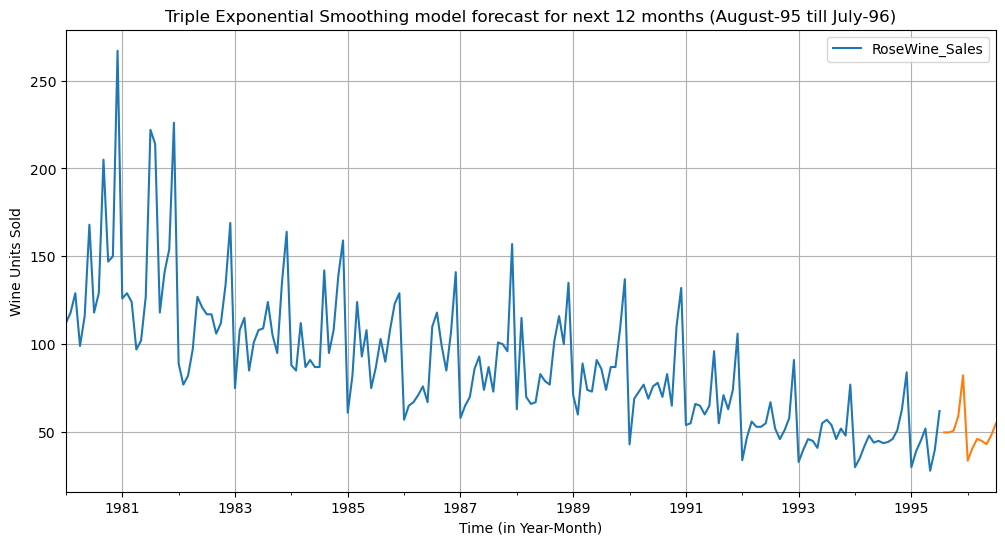

In [207]:
plt.figure(figsize=(18,9))
df.plot();
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.legend(loc='best')
plt.grid();
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

In [208]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
predicted_df = pd.DataFrame({'lower_ci':prediction - (1.96*np.std(tes_final.resid,ddof=1)),
                          'prediction':prediction,
                          'upper_ci': prediction + (1.96*np.std(tes_final.resid,ddof=1))})
predicted_df.head(12)

lower_ci  prediction    upper_ci
1995-08-31  16.361652   49.823594   83.285537
1995-09-30  16.335773   49.797715   83.259658
1995-10-31  17.315852   50.777794   84.239736
1995-11-30  25.689890   59.151832   92.613774
1995-12-31  48.857692   82.319635  115.781577
1996-01-31   0.247231   33.709173   67.171115
1996-02-29   7.336360   40.798303   74.260245
1996-03-31  12.649917   46.111860   79.573802
1996-04-30  11.505530   44.967472   78.429415
1996-05-31   9.660895   43.122837   76.584779
1996-06-30  14.600565   48.062507   81.524449
1996-07-31  21.318814   54.780756   88.242698

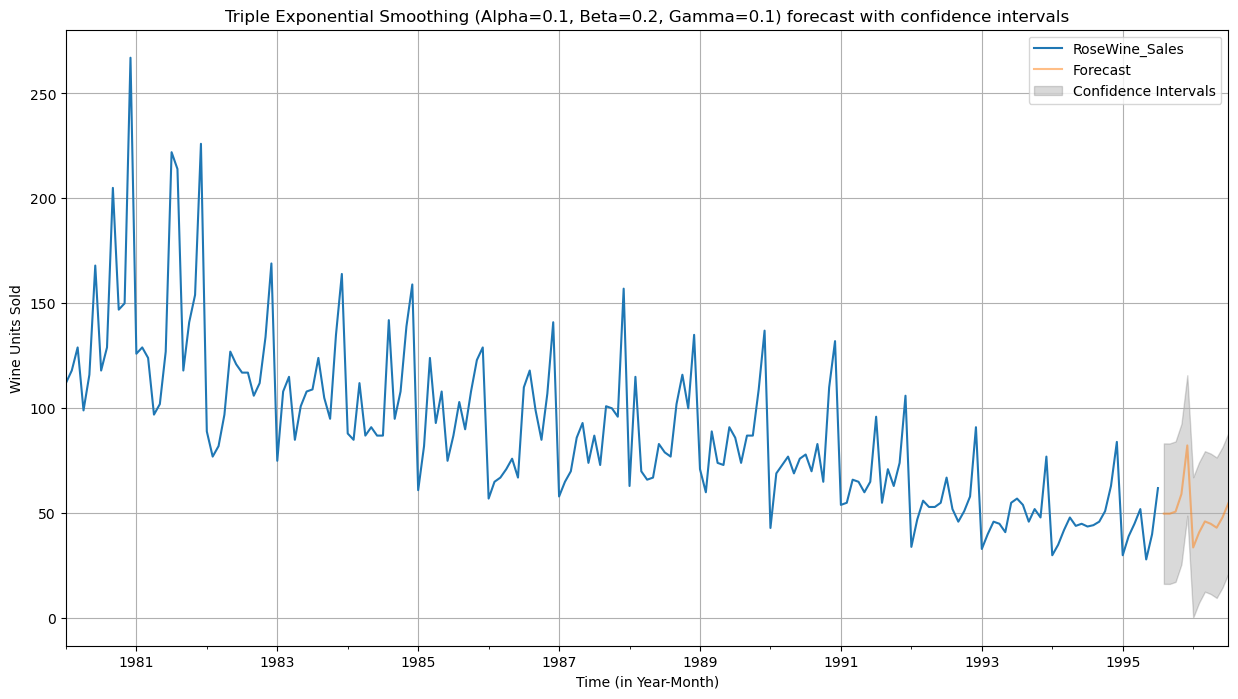

In [209]:
# plot the full data with forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15,label='Confidence Intervals')
plt.title('Triple Exponential Smoothing (Alpha=0.1, Beta=0.2, Gamma=0.1) forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

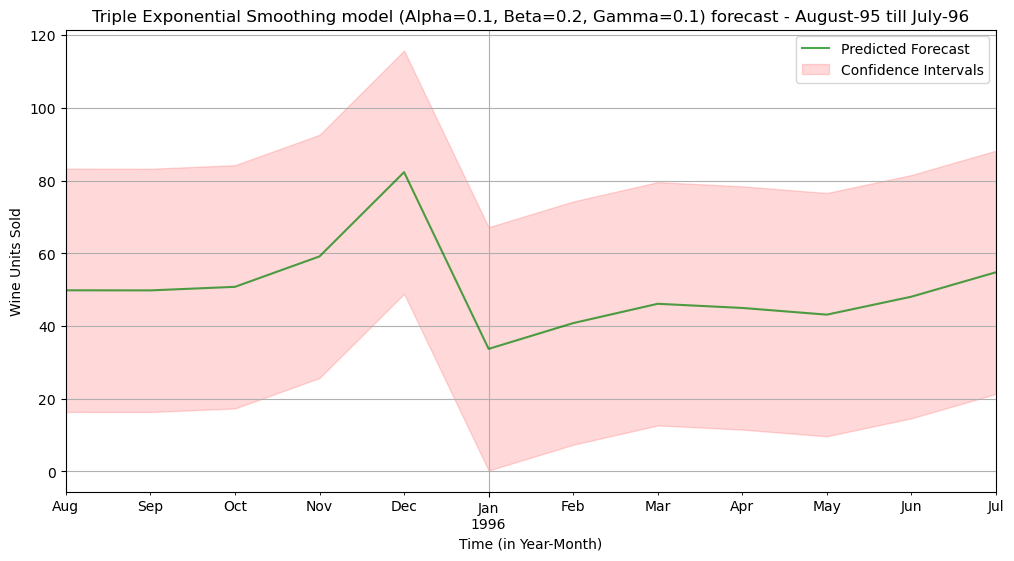

In [210]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,6))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha=0.1, Beta=0.2, Gamma=0.1) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

# Actionable Insights & Recommendations

In [212]:
# Please refer Business Report